<a href="https://colab.research.google.com/github/NataGoto/EvoDron_n/blob/main/Flowers5_rec_uncompleted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Разработка рекомендательной системы Цветы

## Матричная факторизация. ##

### Сходство клиентов ###
Этот метод основывается на том, как похожи клиенты друг на друга на основе их предыдущих покупок. Например, если Марта и Петер часто покупают розы и лилии, то метод сходства клиентов может рекомендовать Марте цветы, которые часто покупает Петер, и наоборот. Этот метод помогает клиентам получить рекомендации на основе покупок других клиентов, схожих с ними.

### Сходство товаров: ###
Этот метод основывается на том, как похожи товары (цветы) друг на друга на основе покупок клиентов. Например, если Марта и Петер оба часто покупают розы, то метод сходства товаров может рекомендовать им другие цветы, которые часто покупают вместе с розами, такие как лилии или тюльпаны. Этот метод помогает клиентам получить рекомендации на основе схожих товаров, которые часто покупают вместе с теми, что они уже выбрал

### Новые клиенты ###
Начальные рекомендации для них могут быть основаны на популярных или наиболее продаваемых товарах, и затем с течением времени их предпочтения могут уточняться на основе их собственных покупок и предпочтений.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Просмотр датасета, наш датасет оформлен со смещением на одну строку вниз всей информации о товаре
dataflowers = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\OneDelivery4.csv')
dataflowers.head()

,﻿№,Оформлен,Заказчик,Пол,Тип заказа,Время доставки,Стоимость,Статус заказа,Товар,Название товара,Название категории,Стоимость товара,Количество
0,67291.0,31.12.2023,911868.0,Женский,Доставка,31.12.2023,3075.0,В работе,69925.0,Отражение души,БУКЕТЫ,2725.0,1.0
1,NaN,NaN,911868.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67290.0,31.12.2023,454851.0,Женский,Доставка,31.12.2023,2546.0,Отменен,70935.0,Зимняя нежность,НОВОГОДНИЕ КОМПОЗИЦИИ,2546.0,1.0
3,NaN,NaN,454851.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67286.0,31.12.2023,165432.0,Женский,Доставка,31.12.2023,1870.0,В работе,129324.0,Роза Pink Mondial,РОЗЫ,1870.0,1.0


In [ ]:
# подсчитываем, сколько файлов, скачяанных по ссылкам, не является jpg
from PIL import Image
import os

def is_jpg(filename):
    try:
        i=Image.open(filename)
        return i.format =='JPEG'
    except IOError:
        return False

directory = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images'
not_jpg_files = 0
total_files = 0
jpg_files = 0

for filename in os.listdir(directory):
    total_files += 1
    if is_jpg(os.path.join(directory, filename)):
        jpg_files += 1
    else:
        not_jpg_files += 1

print(f"Общее количество файлов: {total_files}")
print(f"Количество файлов в формате JPEG: {jpg_files}")
print(f"Количество файлов, которые не являются изображениями в формате JPEG: {not_jpg_files}")

Общее количество файлов: 261
Количество файлов в формате JPEG: 121
Количество файлов, которые не являются изображениями в формате JPEG: 140


In [ ]:
num_rows = newdata.shape[0]
print(f'Количество строк в датасете: {num_rows}')


Количество строк в датасете: 971


In [ ]:
order_status_counts = newdata['Статус заказа'].value_counts()
print(order_status_counts)


В работе       224
Отменен        143
В обработке     56
Name: Статус заказа, dtype: int64


In [ ]:
unique_categories = newdata['Название категории'].nunique()
print(f'Количество уникальных категорий: {unique_categories}')


Количество уникальных категорий: 20


In [ ]:
unique_products = newdata['Товар'].nunique()
duplicate_products = newdata[newdata.duplicated(['Товар'])].shape[0]
print(f'Количество уникальных товаров: {unique_products}')
print(f'Количество повторных товаров: {duplicate_products}')


Количество уникальных товаров: 141
Количество повторных товаров: 829


In [ ]:
repeat_customers = newdata[newdata.duplicated(['Заказчик'])].shape[0]
print(f'Количество повторных покупателей: {repeat_customers}')


Количество повторных покупателей: 708


In [ ]:
# после сохранения jpeg можно убрать колонку со ссылками, а также выровняем данные о покупателе и товаре
dataflowers = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\OneDelivery4.csv')
dataflowers.head(7)

,﻿№,Оформлен,Заказчик,Пол,Тип заказа,Время доставки,Стоимость,Статус заказа,Товар,Название товара,Название категории,Ссылка на изображение,Стоимость товара,Количество
0,67291.0,31.12.2023,911868.0,Женский,Доставка,31.12.2023,3075.0,В работе,69925.0,Отражение души,БУКЕТЫ,http://admin2.onedelivery.su/slim/tmp2/632d3ca...,2725.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67290.0,31.12.2023,454851.0,Женский,Доставка,31.12.2023,2546.0,Отменен,70935.0,Зимняя нежность,НОВОГОДНИЕ КОМПОЗИЦИИ,http://admin2.onedelivery.su/slim/tmp2/639c3ba...,2546.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67286.0,31.12.2023,165432.0,Женский,Доставка,31.12.2023,1870.0,В работе,129324.0,Роза Pink Mondial,РОЗЫ,http://admin2.onedelivery.su/slim/tmp2/6293925...,1870.0,1.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,67285.0,31.12.2023,76522.0,Мужской,Доставка,31.12.2023,2525.0,Отменен,127809.0,Оранжевый лучик,РОЗЫ,http://admin2.onedelivery.su/slim/tmp2/621dc9e...,2175.0,1.0


In [ ]:
dataflowers = dataflowers.drop('Ссылка на изображение', axis=1)
dataflowers.head(15)

,﻿№,Оформлен,Заказчик,Пол,Тип заказа,Время доставки,Стоимость,Статус заказа,Товар,Название товара,Название категории,Стоимость товара,Количество
0,67291.0,31.12.2023,911868.0,Женский,Доставка,31.12.2023,3075.0,В работе,69925.0,Отражение души,БУКЕТЫ,2725.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67290.0,31.12.2023,454851.0,Женский,Доставка,31.12.2023,2546.0,Отменен,70935.0,Зимняя нежность,НОВОГОДНИЕ КОМПОЗИЦИИ,2546.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67286.0,31.12.2023,165432.0,Женский,Доставка,31.12.2023,1870.0,В работе,129324.0,Роза Pink Mondial,РОЗЫ,1870.0,1.0
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,67285.0,31.12.2023,76522.0,Мужской,Доставка,31.12.2023,2525.0,Отменен,127809.0,Оранжевый лучик,РОЗЫ,2175.0,1.0
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,67284.0,31.12.2023,76522.0,Мужской,Доставка,31.12.2023,2525.0,Отменен,127809.0,Оранжевый лучик,РОЗЫ,2175.0,1.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Удаление строк, где название товара отсутствует
dataflowers = dataflowers[dataflowers['Товар'].notna()]

# Подсчет пропущенных значений до применения ffill
missing_before = dataflowers['Заказчик'].isnull().sum()

# Применение ffill для заполнения пропущенных значений
dataflowers['Заказчик'] = dataflowers['Заказчик'].ffill()

# Подсчет пропущенных значений после применения ffill
missing_after = dataflowers['Заказчик'].isnull().sum()

# Подсчет количества заполненных строк
filled_rows = missing_before - missing_after

print(f"Количество заполненных строк: {filled_rows}")

dataflowers.head(15)

Количество заполненных строк: 0


,﻿№,Оформлен,Заказчик,Пол,Тип заказа,Время доставки,Стоимость,Статус заказа,Товар,Название товара,Название категории,Стоимость товара,Количество
0,67291.0,31.12.2023,911868.0,Женский,Доставка,31.12.2023,3075.0,В работе,69925.0,Отражение души,БУКЕТЫ,2725.0,1.0
1,67290.0,31.12.2023,454851.0,Женский,Доставка,31.12.2023,2546.0,Отменен,70935.0,Зимняя нежность,НОВОГОДНИЕ КОМПОЗИЦИИ,2546.0,1.0
2,67286.0,31.12.2023,165432.0,Женский,Доставка,31.12.2023,1870.0,В работе,129324.0,Роза Pink Mondial,РОЗЫ,1870.0,1.0
3,67285.0,31.12.2023,76522.0,Мужской,Доставка,31.12.2023,2525.0,Отменен,127809.0,Оранжевый лучик,РОЗЫ,2175.0,1.0
4,67284.0,31.12.2023,76522.0,Мужской,Доставка,31.12.2023,2525.0,Отменен,127809.0,Оранжевый лучик,РОЗЫ,2175.0,1.0
5,67278.0,30.12.2023,12861.0,Мужской,Самовывоз,NaN,1860.0,В обработке,586.0,Краски природы,БУКЕТЫ,1860.0,1.0
6,67273.0,30.12.2023,100938.0,Мужской,Доставка,30.12.2023,2747.0,Отменен,1647.0,Сказка,НОВОГОДНИЕ КОМПОЗИЦИИ,2397.0,1.0
7,67272.0,30.12.2023,100938.0,Мужской,Доставка,30.12.2023,2747.0,Отменен,1647.0,Сказка,НОВОГОДНИЕ КОМПОЗИЦИИ,2397.0,1.0
8,67271.0,30.12.2023,100938.0,Мужской,Доставка,30.12.2023,2747.0,Отменен,1647.0,Сказка,НОВОГОДНИЕ КОМПОЗИЦИИ,2397.0,1.0
9,67269.0,30.12.2023,965218.0,Мужской,Самовывоз,NaN,2995.0,В работе,127723.0,Несгораемая страсть,АКЦИЯ,2995.0,1.0


In [ ]:
#После чистки датасета сбрасываем индексы
dataflowers = dataflowers.reset_index(drop=True)

dataflowers.head(7)

,﻿№,Оформлен,Заказчик,Пол,Тип заказа,Время доставки,Стоимость,Статус заказа,Товар,Название товара,Название категории,Стоимость товара,Количество
0,67291.0,31.12.2023,911868.0,Женский,Доставка,31.12.2023,3075.0,В работе,69925.0,Отражение души,БУКЕТЫ,2725.0,1.0
1,67290.0,31.12.2023,454851.0,Женский,Доставка,31.12.2023,2546.0,Отменен,70935.0,Зимняя нежность,НОВОГОДНИЕ КОМПОЗИЦИИ,2546.0,1.0
2,67286.0,31.12.2023,165432.0,Женский,Доставка,31.12.2023,1870.0,В работе,129324.0,Роза Pink Mondial,РОЗЫ,1870.0,1.0
3,67285.0,31.12.2023,76522.0,Мужской,Доставка,31.12.2023,2525.0,Отменен,127809.0,Оранжевый лучик,РОЗЫ,2175.0,1.0
4,67284.0,31.12.2023,76522.0,Мужской,Доставка,31.12.2023,2525.0,Отменен,127809.0,Оранжевый лучик,РОЗЫ,2175.0,1.0
5,67278.0,30.12.2023,12861.0,Мужской,Самовывоз,NaN,1860.0,В обработке,586.0,Краски природы,БУКЕТЫ,1860.0,1.0
6,67273.0,30.12.2023,100938.0,Мужской,Доставка,30.12.2023,2747.0,Отменен,1647.0,Сказка,НОВОГОДНИЕ КОМПОЗИЦИИ,2397.0,1.0


In [ ]:
# Сортировка по 'Заказчик'
# Подсчет повторений каждого заказчика
customer_counts = dataflowers['Заказчик'].value_counts()

# Создание нового датафрейма с сортировкой по повторности заказчиков
dataflowers_customer = dataflowers.set_index('Заказчик').loc[customer_counts.index]

# Подсчет количества клиентов, сделавших определенное количество заказов
order_counts = customer_counts.value_counts()

# Вывод результатов
print(order_counts)


count
1     121
2      86
3      21
4      16
6       8
7       3
5       3
13      1
12      1
11      1
8       1
Name: count, dtype: int64


**Есть покупатели, которые часто отменяют заказы.**

In [ ]:
# Сортировка по 'Стоимость товара' и по количеству продаж в порядке убывания для того, чтобы отсекать по n top
# менее дорогие товары
# Сохранение отсортированного по стоимости датасета
dataflowers_cost = dataflowers.sort_values(by='Стоимость товара', ascending=False)
dataflowers_cost.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\dataflowers_cost.csv', index=False)
dataflowers_cost.head(7)

,﻿№,Оформлен,Заказчик,Пол,Тип заказа,Время доставки,Стоимость,Статус заказа,Товар,Название товара,Название категории,Стоимость товара,Количество
537,66007.0,02.10.2023,642777.0,Женский,Доставка,02.10.2023,22390.0,Отменен,6905.0,Калейдоскоп,РОЗЫ,22160.0,1.0
182,66832.0,29.11.2023,528877.0,Мужской,Доставка,29.11.2023,22160.0,В работе,6905.0,Калейдоскоп,РОЗЫ,22160.0,1.0
167,66860.0,01.12.2023,572347.0,Мужской,Самовывоз,NaN,11610.0,Отменен,6902.0,Глубокие чувства,РОЗЫ,11610.0,1.0
166,66861.0,01.12.2023,572347.0,Мужской,Самовывоз,NaN,11610.0,В обработке,6902.0,Глубокие чувства,РОЗЫ,11610.0,1.0
178,66834.0,29.11.2023,534745.0,Мужской,Доставка,29.11.2023,13432.0,В работе,129806.0,Роза Кения микс 101 шт Акция,АКЦИЯ,9685.0,1.0
406,66367.0,24.10.2023,728512.0,Мужской,Доставка,25.10.2023,9720.0,В работе,129806.0,Роза Кения микс 101 шт Акция,АКЦИЯ,9685.0,1.0
125,66962.0,08.12.2023,659969.0,Мужской,Доставка,09.12.2023,9425.0,Отменен,16542.0,Мегабукет,БУКЕТЫ,9275.0,1.0


In [ ]:
# Сортировка по количеству и сохранение
dataflowers_quantity = dataflowers.sort_values(by='Количество', ascending=False)
dataflowers_quantity.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\dataflowers_quantity.csv', index=False)
dataflowers_quantity.head(16)


,﻿№,Оформлен,Заказчик,Пол,Тип заказа,Время доставки,Стоимость,Статус заказа,Товар,Название товара,Название категории,Стоимость товара,Количество
590,66556.0,10.11.2023,457983.0,Мужской,Доставка,11.11.2023,12949.0,В работе,16535.0,Шар Зеркальный блеск 30 см,ВОЗДУШНЫЕ ШАРЫ,150.0,11.0
870,NaN,NaN,102132.0,NaN,NaN,NaN,NaN,NaN,16533.0,Шар Именины 30 см,ВОЗДУШНЫЕ ШАРЫ,130.0,5.0
736,NaN,NaN,111709.0,NaN,NaN,NaN,NaN,NaN,16532.0,Шар Хром 30 см,ВОЗДУШНЫЕ ШАРЫ,150.0,5.0
591,NaN,NaN,457983.0,NaN,NaN,NaN,NaN,NaN,128830.0,Леденцы,СОПУТСТВУЮЩИЕ ТОВАРЫ,100.0,5.0
851,66089.0,10.10.2023,567750.0,Мужской,Доставка,10.10.2023,3525.0,Отменен,128829.0,Леденцы- сердце,СОПУТСТВУЮЩИЕ ТОВАРЫ,100.0,4.0
845,66090.0,10.10.2023,567750.0,Мужской,Доставка,10.10.2023,3525.0,В работе,128829.0,Леденцы- сердце,СОПУТСТВУЮЩИЕ ТОВАРЫ,100.0,4.0
470,NaN,NaN,513317.0,NaN,NaN,NaN,NaN,NaN,16532.0,Шар Хром 30 см,ВОЗДУШНЫЕ ШАРЫ,150.0,3.0
93,NaN,NaN,452460.0,NaN,NaN,NaN,NaN,NaN,16532.0,Шар Хром 30 см,ВОЗДУШНЫЕ ШАРЫ,150.0,3.0
567,NaN,NaN,446311.0,NaN,NaN,NaN,NaN,NaN,16532.0,Шар Хром 30 см,ВОЗДУШНЫЕ ШАРЫ,150.0,3.0
679,NaN,NaN,567750.0,NaN,NaN,NaN,NaN,NaN,16533.0,Шар Именины 30 см,ВОЗДУШНЫЕ ШАРЫ,130.0,3.0


**Помногу берут сопутствующие товары, а букеты по одной штуке.**

In [ ]:
# Сортировка по 'Заказчик'
# Подсчет повторений каждого заказчика
customer_counts = dataflowers['Заказчик'].value_counts()

# Создание нового датафрейма с сортировкой по повторности заказчиков
dataflowers_customer = dataflowers.set_index('Заказчик').loc[customer_counts.index]
dataflowers_customer.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\dataflowers_quantity.csv', index=False)
# Проверка результатов
print(dataflowers_customer.iloc[124:150])


               ﻿№    Оформлен      Пол Тип заказа Время доставки  Стоимость  \
Заказчик                                                                      
539563.0  66776.0  26.11.2023  Мужской   Доставка     26.11.2023     2575.0   
539563.0  66758.0  25.11.2023  Мужской   Доставка     26.11.2023     2625.0   
539563.0  66660.0  18.11.2023  Мужской   Доставка     18.11.2023     2917.0   
539563.0  66448.0  01.11.2023  Мужской   Доставка     01.11.2023     2750.0   
893486.0  66685.0  20.11.2023  Женский   Доставка     21.11.2023     1920.0   
893486.0      NaN         NaN      NaN        NaN            NaN        NaN   
893486.0  66684.0  20.11.2023  Женский   Доставка     21.11.2023     1920.0   
893486.0      NaN         NaN      NaN        NaN            NaN        NaN   
667225.0  66833.0  29.11.2023  Мужской  Самовывоз            NaN     2400.0   
667225.0  66818.0  28.11.2023  Мужской   Доставка     28.11.2023     2400.0   
667225.0  66097.0  10.10.2023  Мужской   Доставка   

**Много заказов с отменой, подсчитаем, сколько**

In [ ]:
# Подсчет количества заказов для каждого статуса
status_counts = dataflowers['Статус заказа'].value_counts()

# Вывод результатов
print(status_counts)

# Подсчет количества заказов для каждого статуса как доли от общего числа заказов
status_counts = dataflowers['Статус заказа'].value_counts(normalize=True)

# Вывод результатов
print(status_counts)


Статус заказа
В работе       224
Отменен        143
В обработке     56
Name: count, dtype: int64
Статус заказа
В работе       0.529551
Отменен        0.338061
В обработке    0.132388
Name: proportion, dtype: float64


In [ ]:
# заполним нан там, где это возможно.
# Заполнение пропущенных значений данными из предыдущих строк
# Заполнение пропущенных значений данными из предыдущих строк
dataflowers['Пол'] = dataflowers['Пол'].ffill()
dataflowers['Оформлен'] = dataflowers['Оформлен'].ffill()
dataflowers['Тип заказа'] = dataflowers['Тип заказа'].ffill()

dataflowers.head(10)

,﻿№,Оформлен,Заказчик,Пол,Тип заказа,Время доставки,Стоимость,Статус заказа,Товар,Название товара,Название категории,Стоимость товара,Количество
0,67291.0,31.12.2023,911868.0,Женский,Доставка,31.12.2023,3075.0,В работе,69925.0,Отражение души,БУКЕТЫ,2725.0,1.0
1,67290.0,31.12.2023,454851.0,Женский,Доставка,31.12.2023,2546.0,Отменен,70935.0,Зимняя нежность,НОВОГОДНИЕ КОМПОЗИЦИИ,2546.0,1.0
2,67286.0,31.12.2023,165432.0,Женский,Доставка,31.12.2023,1870.0,В работе,129324.0,Роза Pink Mondial,РОЗЫ,1870.0,1.0
3,67285.0,31.12.2023,76522.0,Мужской,Доставка,31.12.2023,2525.0,Отменен,127809.0,Оранжевый лучик,РОЗЫ,2175.0,1.0
4,67284.0,31.12.2023,76522.0,Мужской,Доставка,31.12.2023,2525.0,Отменен,127809.0,Оранжевый лучик,РОЗЫ,2175.0,1.0
5,67278.0,30.12.2023,12861.0,Мужской,Самовывоз,NaN,1860.0,В обработке,586.0,Краски природы,БУКЕТЫ,1860.0,1.0
6,67273.0,30.12.2023,100938.0,Мужской,Доставка,30.12.2023,2747.0,Отменен,1647.0,Сказка,НОВОГОДНИЕ КОМПОЗИЦИИ,2397.0,1.0
7,67272.0,30.12.2023,100938.0,Мужской,Доставка,30.12.2023,2747.0,Отменен,1647.0,Сказка,НОВОГОДНИЕ КОМПОЗИЦИИ,2397.0,1.0
8,67271.0,30.12.2023,100938.0,Мужской,Доставка,30.12.2023,2747.0,Отменен,1647.0,Сказка,НОВОГОДНИЕ КОМПОЗИЦИИ,2397.0,1.0
9,67269.0,30.12.2023,965218.0,Мужской,Самовывоз,NaN,2995.0,В работе,127723.0,Несгораемая страсть,АКЦИЯ,2995.0,1.0


# Система сходства заказчиков

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# Фильтрация данных для учета только продаж
sold_data = dataflowers[dataflowers['Статус заказа'].isin(['В работе', 'В обработке'])]

# Создание словарей для сопоставления идентификаторов пользователя и товара с индексами строк и столбцов
user_to_index = {user: i for i, user in enumerate(sold_data['Заказчик'].unique())}
item_to_index = {item: i for i, item in enumerate(sold_data['Товар'].unique())}

# Создание матрицы пользователь-элемент
n_clients = len(user_to_index)
n_items = len(item_to_index)
user_item_matrix = np.zeros((n_clients, n_items))

for index, row in sold_data.iterrows():
    user_item_matrix[user_to_index[row['Заказчик']], item_to_index[row['Товар']]] = 1

# Разделение данных на обучающий и тестовый наборы
train_data, test_data = train_test_split(user_item_matrix, test_size=0.20, random_state=42)


In [ ]:
# Создаем матрицу пользователь-элемент для тестового набора данных
n_clients_test = user_item_matrix.shape[0]  # Берем количество строк из обучающей матрицы
n_items_test = user_item_matrix.shape[1]  # Берем количество столбцов из обучающей матрицы
test_data_matrix = np.zeros((n_clients_test, n_items_test))

for row in test_data:
    client_id, item_id = int(row[0]), int(row[1])
    test_data_matrix[client_id, item_id] = 1

# Расчет косинусного сходства между пользователями
user_similarity = cosine_similarity(train_data)

# Функция для предсказания рекомендаций
def predict(ratings, similarity):
    ratings_diff = ratings - ratings.mean(axis=1)[:, np.newaxis]
    pred = similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    return pred + ratings.mean(axis=1)[:, np.newaxis]

# Предсказание рекомендаций
user_prediction = predict(train_data, user_similarity)

# Преобразование предсказаний в DataFrame для удобства
user_prediction_df = pd.DataFrame(user_prediction, columns=[f'Item {i}' for i in range(n_items_test)])


In [ ]:
print(user_prediction_df)

       Item 0    Item 1    Item 2    Item 3    Item 4    Item 5    Item 6  \
0   -0.001688 -0.001688 -0.001688 -0.001688 -0.001688 -0.001688 -0.001688   
1    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3    0.996803 -0.003197 -0.003197 -0.003197 -0.003197 -0.003197 -0.003197   
4    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
..        ...       ...       ...       ...       ...       ...       ...   
174  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
175 -0.000983 -0.000983 -0.000983 -0.000983  0.999017 -0.000983 -0.000983   
176  0.006213  0.006213  0.006213  0.006213  0.006213  0.006213  0.006213   
177 -0.003666 -0.003666 -0.003666 -0.003666 -0.003666 -0.003666  0.203441   
178 -0.002950 -0.002950  0.108161 -0.002950 -0.002950 -0.002950 -0.002950   

       Item 7    Item 8    Item 9  ...  Item 103  Item 104  Item 105  \
0  

In [ ]:
# Предсказание для похожего клиента на основе матричной факторизации
def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

# Нормализация оценок
user_prediction_norm = (user_prediction - user_prediction.min()) / (user_prediction.max() - user_prediction.min())

# Выбор порога и фильтрация рекомендаций
threshold = 0.5
client_recommendations = np.where(user_prediction_norm > threshold, 1, 0)

# Преобразование рекомендаций в DataFrame
client_recommendations_df = pd.DataFrame(client_recommendations, columns=[f'Item {i}' for i in range(n_items_test)])

# Вывод всех рекомендованных товаров для пользователя с индексом 87
recommended_items = client_recommendations_df.iloc[16]
recommended_items_indices = recommended_items[recommended_items == 1].index
print(recommended_items_indices)


Index(['Item 15', 'Item 20'], dtype='object')


In [ ]:
# Вывод всех рекомендованных товаров для каждого пользователя
for user_index in range(client_recommendations_df.shape[0]):
    recommended_items = client_recommendations_df.iloc[user_index]
    recommended_items_indices = recommended_items[recommended_items == 1].index
    print(f"Заказчику {user_index} рекомендованы товары: {list(recommended_items_indices)}")


Заказчику 0 рекомендованы товары: ['Item 15']
Заказчику 1 рекомендованы товары: ['Item 43']
Заказчику 2 рекомендованы товары: ['Item 48']
Заказчику 3 рекомендованы товары: ['Item 0']
Заказчику 4 рекомендованы товары: ['Item 68']
Заказчику 5 рекомендованы товары: ['Item 4']
Заказчику 6 рекомендованы товары: ['Item 76']
Заказчику 7 рекомендованы товары: ['Item 56']
Заказчику 8 рекомендованы товары: ['Item 35']
Заказчику 9 рекомендованы товары: ['Item 16']
Заказчику 10 рекомендованы товары: ['Item 16']
Заказчику 11 рекомендованы товары: ['Item 53']
Заказчику 12 рекомендованы товары: ['Item 97']
Заказчику 13 рекомендованы товары: ['Item 71']
Заказчику 14 рекомендованы товары: ['Item 10']
Заказчику 15 рекомендованы товары: ['Item 20']
Заказчику 16 рекомендованы товары: ['Item 15', 'Item 20']
Заказчику 17 рекомендованы товары: ['Item 96']
Заказчику 18 рекомендованы товары: ['Item 16']
Заказчику 19 рекомендованы товары: ['Item 65', 'Item 102']
Заказчику 20 рекомендованы товары: ['Item 10']
За

In [ ]:
# Функция для сборщика - похожие клиенты
def get_similar_client_recommendations(matrix_client_id):
    # Проверяем, есть ли пользователь в матрице
    if matrix_client_id in client_recommendations_df.index:
        # Получаем рекомендации для пользователя
        user_recommendations = client_recommendations_df.iloc[matrix_client_id]
        return user_recommendations
    else:
        # Если пользователя нет в матрице, возвращаем сообщение об ошибке
        return "Пользователь не найден в матрице"


In [ ]:
# проверка функции. Получаем рекомендации через функцию для клиента с индексом 23 (многократный повторный)
recommended_items = get_similar_client_recommendations(23)

# Находим индексы рекомендованных товаров
recommended_items_indices = recommended_items[recommended_items == 1].index

# Выводим индексы рекомендованных товаров
print(recommended_items_indices)

Index(['Item 2', 'Item 55'], dtype='object')


# Система сходства товаров

In [ ]:

# Расчет косинусного сходства между элементами (есть нули, поэтому добавляем эпсилон)
item_similarity = cosine_similarity(train_data.T)

# Функция для предсказания рекомендаций на основе сходства элементов
def predict_item_based(ratings, similarity):
    epsilon = 1e-9
    pred = ratings.dot(similarity) / (np.array([np.abs(similarity).sum(axis=1)]) + epsilon)
    return pred

# Предсказание рекомендаций на основе сходства элементов
item_prediction = predict_item_based(train_data, item_similarity)

# Преобразование предсказаний в DataFrame
item_prediction_df = pd.DataFrame(item_prediction, columns=[f'Товар {i}' for i in range(n_items)])


In [ ]:
print(item_prediction_df)

      Товар 0  Товар 1   Товар 2  Товар 3   Товар 4  Товар 5   Товар 6  \
0    0.000000      0.0  0.000000      0.0  0.000000      0.0  0.000000   
1    0.000000      0.0  0.000000      0.0  0.000000      0.0  0.000000   
2    0.000000      0.0  0.000000      0.0  0.000000      0.0  0.000000   
3    0.523408      0.0  0.000000      0.0  0.000000      0.0  0.000000   
4    0.000000      0.0  0.000000      0.0  0.000000      0.0  0.000000   
..        ...      ...       ...      ...       ...      ...       ...   
174  0.000000      0.0  0.000000      0.0  0.000000      0.0  0.000000   
175  0.000000      0.0  0.000000      0.0  0.634612      0.0  0.000000   
176  0.000000      0.0  0.000000      0.0  0.000000      0.0  0.000000   
177  0.000000      0.0  0.000000      0.0  0.000000      0.0  0.261204   
178  0.000000      0.0  0.072192      0.0  0.000000      0.0  0.000000   

     Товар 7  Товар 8  Товар 9  ...  Товар 103  Товар 104  Товар 105  \
0        0.0      0.0      0.0  ...    

In [ ]:
# Нормализация оценок
item_prediction_norm = (item_prediction - item_prediction.min()) / (item_prediction.max() - item_prediction.min())

# Выбор порога и фильтрация рекомендаций
threshold = 0.5
item_recommendations = np.where(item_prediction_norm > threshold, 1, 0)

# Преобразование рекомендаций в DataFrame
item_recommendations_df = pd.DataFrame(item_recommendations, columns=[f'Товар {i}' for i in range(n_items)])

# Вывод всех рекомендованных товаров для пользователя с индексом 11
recommended_items = item_recommendations_df.iloc[11]
recommended_items_indices = recommended_items[recommended_items == 1].index
print(recommended_items_indices)

Index(['Товар 53'], dtype='object')


In [ ]:
# Вывод всех рекомендованных товаров для каждого пользователя
for user_index in range(item_recommendations_df.shape[0]):
    recommended_items = item_recommendations_df.iloc[user_index]
    recommended_items_indices = recommended_items[recommended_items == 1].index
    print(f"Заказчику {user_index} рекомендованы товары: {list(recommended_items_indices)}")

Заказчику 0 рекомендованы товары: ['Товар 15']
Заказчику 1 рекомендованы товары: ['Товар 43']
Заказчику 2 рекомендованы товары: ['Товар 48']
Заказчику 3 рекомендованы товары: ['Товар 0']
Заказчику 4 рекомендованы товары: ['Товар 68']
Заказчику 5 рекомендованы товары: ['Товар 4']
Заказчику 6 рекомендованы товары: ['Товар 76']
Заказчику 7 рекомендованы товары: ['Товар 56']
Заказчику 8 рекомендованы товары: []
Заказчику 9 рекомендованы товары: ['Товар 16']
Заказчику 10 рекомендованы товары: ['Товар 16']
Заказчику 11 рекомендованы товары: ['Товар 53']
Заказчику 12 рекомендованы товары: ['Товар 97']
Заказчику 13 рекомендованы товары: ['Товар 71']
Заказчику 14 рекомендованы товары: ['Товар 10']
Заказчику 15 рекомендованы товары: ['Товар 20', 'Товар 35', 'Товар 42']
Заказчику 16 рекомендованы товары: ['Товар 15']
Заказчику 17 рекомендованы товары: ['Товар 96']
Заказчику 18 рекомендованы товары: ['Товар 16']
Заказчику 19 рекомендованы товары: ['Товар 65', 'Товар 102']
Заказчику 20 рекомендован

In [ ]:
# Расчет квадратичной ошибки по схожести покупателей
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

# Расчет RMSE
rmse_score = rmse(user_prediction, test_data_matrix)
print(f'RMSE для похожих заказчиков: {rmse_score}')


RMSE для похожих заказчиков: 1.0011256470318894


In [ ]:
# Расчет квадратичной ошибки по схожести товаров (цветков)
def rmse(prediction, ground_truth):
    prediction = prediction[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return sqrt(mean_squared_error(prediction, ground_truth))

# Расчет RMSE
rmse_score = rmse(item_prediction, test_data_matrix)
print(f'RMSE для похожих товаров: {rmse_score}')



RMSE для похожих товаров: 1.0


**Как мы видим, квадратичная ошибка довольно велика. Вероятно, из-за того, большинство ваших пользователей совершили только одну покупку. 121 заказчик купил товар только 1 раз, 86 заказчиков 2 раза, 21 - 3 раза, 16 - 4 раза, 6 - 8 раз  и единицы более 8 раз.
Предполагаю, что заказчику может быть выгодно использовать модели матричной факторизации только после накопления определенного количества данных. На сегодня же данные настолько разрежены, что
8     и, основанной  на коллаборативной фильтрацииможет иметь недостаточно информации для выявления закономерностей и предсказания поведения польли товарами. Если большинство пользователей совершили только одну покупку, то может быть сложно найти пользователей с похожими пр**едпочтениями.

In [ ]:
test_data_matrix.shape

(224, 113)

In [ ]:
user_prediction.shape

(179, 113)

In [ ]:
# напишем функцию по методу схожих товаров для сборщика функций
def get_similar_item_recommendations(matrix_client_id):
    # Проверяем, есть ли пользователь в матрице
    if matrix_client_id in range(user_item_matrix.shape[0]):
        # Получаем рекомендации для пользователя
        user_recommendations = item_recommendations_df.iloc[matrix_client_id]
        return user_recommendations
    else:
        # Если пользователя нет в матрице, возвращаем сообщение об ошибке
        return "Пользователь не найден в матрице"


In [ ]:
# Получаем рекомендации через функцию для клиента с индексом 23 (многократный повторный)
recommended_items = get_similar_item_recommendations(23)

# Находим индексы рекомендованных товаров
recommended_items_indices = recommended_items[recommended_items == 1].index

# Выводим индексы рекомендованных товаров
print(recommended_items_indices)


Index(['Товар 2', 'Товар 55', 'Товар 80', 'Товар 100'], dtype='object')


In [ ]:
# А сколько у нас всего повторных заказчиков с учетом разных ьдат оформления?
# Преобразуем дату заказа в формат datetime
dataflowers['Оформлен'] = pd.to_datetime(dataflowers['Оформлен'], dayfirst=True)

# Группируем данные по клиенту и дате заказа
repeat_customers = dataflowers.groupby(['Заказчик', dataflowers['Оформлен'].dt.date]).size().reset_index(name='count')

 # Оставляем только тех клиентов, которые сделали более 2 заказов
repeat_customers1 = repeat_customers.groupby('Заказчик').filter(lambda x: len(x) > 1)

 # Оставляем только тех клиентов, которые сделали более 2 заказов
repeat_customers2 = repeat_customers.groupby('Заказчик').filter(lambda x: len(x) > 2)

# Получаем уникальные идентификаторы клиентов
repeat_customers_indices1 = repeat_customers1['Заказчик'].unique()
repeat_customers_indices2 = repeat_customers2['Заказчик'].unique()
print(f"Индексы совершивших более 1 покупки: {repeat_customers_indices1} индексы совершивших более 2 покупок {repeat_customers_indices2}")

Индексы совершивших более 1 покупки: [  4843.  12861.  65257.  65277.  76522.  78722.  94108. 100938. 109246.
 111709. 132101. 272839. 292943. 293837. 305574. 395114. 406369. 452460.
 491449. 493445. 513597. 519458. 525476. 525666. 528877. 539563. 560489.
 564524. 567750. 595661. 617466. 659969. 667225. 701790. 707859. 728512.
 734582. 756078. 765699. 823658. 842726. 849984. 859045. 865430. 874083.
 911868. 951703.] индексы совершивших более 2 покупок [ 12861. 292943. 395114. 493445. 513597. 539563. 617466. 667225. 756078.
 823658.]


**У нас всего 10 повторных покупателей, сделавших более 2 покупок.**

## Коллаборативная фильтрация на основе моделей ##

In [ ]:
import scipy.sparse as sp
from scipy.sparse.linalg import svds

In [ ]:
# разложение SVD для разреженной user_item_matrix
# Матрица "S" - это диагональная матрица, где на диагонали находятся сингулярные значения (singular values),
# которые представляют собой важность каждого латентного фактора,автоматически вычисляются при выполнении SVD,
# упорядочиваются по убыванию важности.
# Матрица "V^T" - это матрица, содержащая латентные факторы для каждого товара (букета).
u, s, vt = svds(user_item_matrix, k=4)

s_diag_matrix = np.diag(s)

In [ ]:
s

array([3.62152892, 3.72976454, 4.29351113, 4.35214852])

In [ ]:
s.shape

(4,)

In [ ]:
s_diag_matrix.shape

(4, 4)

In [ ]:
# предсказываем
X_pred = np.dot(np.dot(u, s_diag_matrix), vt)

In [ ]:
# Нормализация предсказанных оценок X_pred
X_pred_norm = (X_pred - X_pred.min()) / (X_pred.max() - X_pred.min())

# Задаем порог для фильтрации рекомендаций
threshold = 0.5

# Фильтруем рекомендации, где предсказанные оценки больше порога
collaborative_recommendations = (X_pred_norm > threshold).astype(int)

# Создаем DataFrame для рекомендаций с именами пользователей и элементов
collaborative_recommendations_df = pd.DataFrame(client_recommendations, columns=[f'Товар {i}' for i in range(n_items)])

# Вывод всех рекомендованных товаров для первого пользователя
recommended_items = collaborative_recommendations_df.iloc[0]
recommended_items_indices = recommended_items[recommended_items == 1].index

# Вывод всех индексов
for index in recommended_items_indices:
    print(f"Заказчику 0 рекомендован товар: {index}")


Заказчику 0 рекомендован товар: Товар 15


In [ ]:
X_pred.shape

(224, 113)

In [ ]:
# выводим метрику
print('Среднеквадратичная ошибка для коллаборативной фильтрации пользователей: ' + str(rmse(X_pred, test_data_matrix)))

Среднеквадратичная ошибка для коллаборативной фильтрации пользователей: 0.8209040621805074


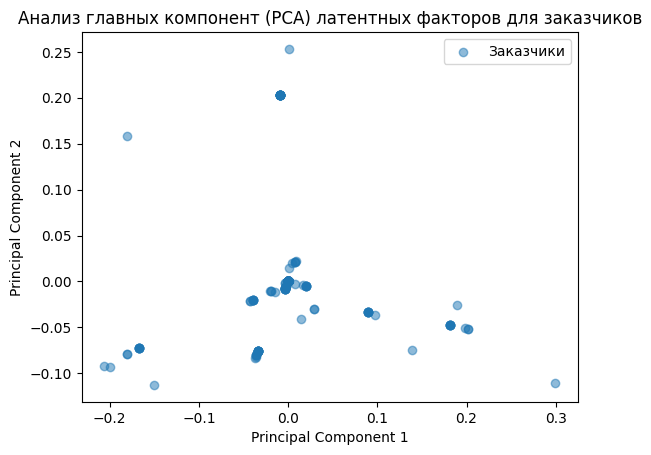

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Предположим, что u - это ваша матрица латентных факторов
pca = PCA(n_components=2)
u_pca = pca.fit_transform(u)

plt.scatter(u_pca[:, 0], u_pca[:, 1], label='Заказчики', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Анализ главных компонент (PCA) латентных факторов для заказчиков')
plt.legend()
plt.show()

**Использование метода главных компонент (PCA) нельзя считать эффективным с текущим датасетом. Этот метод хорошо работает, когда в данных есть четкие шаблоны или структуры, которые можно выявить. Когда повторных покупателей очнь мало, проще использовать методы классификации для предсказания, совершит ли новый покупатель повторную покупку или нет или использовать методы кластеризации для выявления групп покупателей с похожими характеристиками (например, на основе категорий товаров).**

# Гибридная рекомендательная система #

Есть идеи по существующему датасету: использовать сезон и сопоставлять с текущей датой, предлагать букеты:
-наиболее стойкие букеты и популярные цветы сезона на основании данных по ссылке https://botanicashop.ru/news/sezonnye-cvety?ysclid=lrkhhs73zb90433025
-букеты к праздникам по датам праздников.
Однако обнаруживаем, что у нас нет описания состава букетов. Придется тут такдет применить нейронку по распознаванию цветов.


In [ ]:
#Препроцессинг
import pandas as pd

# Метки датасета Цветы 102
flowers102 = pd.read_csv('C:/Users/Admin/Desktop/Питон/Рекомендации1/oxford flowers 102.v1i.multiclass/train/_classes.csv')
flowers102.head()

,filename,1,10,100,101,102,11,12,13,14,...,90,91,92,93,94,95,96,97,98,99
0,image_06066_jpg.rf.0005df53c019b5842dab1ebe374...,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,image_06422_jpg.rf.000c2556979ae54639d47ecc61f...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,image_02039_jpg.rf.002ab7e9f31225d3ac4b2845fd0...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,image_01457_jpg.rf.0002c7062319292de4e6510252c...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,image_07959_jpg.rf.0011c1e6c8499849f9bc1b6f85a...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
flowers102 = flowers102.sort_index(axis=1)
flowers102.head()

,1,10,100,101,102,11,12,13,14,15,...,91,92,93,94,95,96,97,98,99,filename
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,image_06066_jpg.rf.0005df53c019b5842dab1ebe374...
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,image_06422_jpg.rf.000c2556979ae54639d47ecc61f...
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,image_02039_jpg.rf.002ab7e9f31225d3ac4b2845fd0...
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,image_01457_jpg.rf.0002c7062319292de4e6510252c...
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,image_07959_jpg.rf.0011c1e6c8499849f9bc1b6f85a...


In [ ]:
'''import os

# Путь к директории с изображениями
directory = "C:/Users/Admin/Desktop/Питон/Рекомендации1/oxford flowers 102.v1i.multiclass/train/"

# Перебираем все файлы в директории
for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        # Разделяем имя файла по точке и берем первую часть до "_jpg"
        short_name = filename.split("_jpg")[0]
        # Добавляем расширение ".jpg" обратно
        new_name = short_name + ".jpg"
        # Полный путь к старому и новому файлу
        old_file = os.path.join(directory, filename)
        new_file = os.path.join(directory, new_name)
        # Переименовываем файл
        os.rename(old_file, new_file)'''


In [ ]:
# срзхраняем данные в датафреймах
import pandas as pd
from PIL import Image
import numpy as np

directories = [r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\train',
               r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\valid',
               r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\test']
dataframes = []

for directory in directories:
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img = Image.open(os.path.join(directory, filename))
            img_array = np.array(img).flatten()
            images.append(img_array)
            labels.append(filename.split(".")[0])
    df = pd.DataFrame(images)
    df['label'] = labels
    dataframes.append(df)

# Сохраняем датафреймы
dataframes[0].to_pickle("train_df.pkl")
dataframes[1].to_pickle("valid_df.pkl")
dataframes[2].to_pickle("test_df.pkl")


In [ ]:
# перенос датафреймов на ПК
from tqdm import tqdm

# Путь к директории
path = "C:/Users/Admin/Desktop/Питон/Рекомендации1/oxford flowers 102.v1i.multiclass/"

# Список датафреймов и их имен
dfs = [(dataframes[0], 'train_df.csv'),
       (dataframes[1], 'valid_df.csv'),
       (dataframes[2], 'test_df.csv')]

# Итерируемся по списку с помощью tqdm для отображения прогресса
for df, name in tqdm(dfs):
    df.to_csv(path + name, index=False)


100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [17:17<00:00, 345.77s/it]


In [ ]:
# Посмотрим что получилось. Загрузка данных из файла CSV
df = pd.read_csv("C:/Users/Admin/Desktop/Питон/Рекомендации1/oxford flowers 102.v1i.multiclass/train_df.csv")

# Просмотр первых 5 строк датафрейма
print(df.head())

     0    1    2    3    4    5    6    7    8    9  ...  150519  150520  \
0  169  189  180  171  191  182  172  192  183  172  ...     103     113   
1   43   59   46   37   53   40   36   48   36   39  ...      23      63   
2   93  126   45   75  108   27   64   96   13   70  ...      46      80   
3   65   89   27   78  102   40   68   94   31   86  ...     144     162   
4   76  109   80   67  100   71   69  102   73   83  ...      24      34   

   150521  150522  150523  150524  150525  150526  150527        label  
0      88     104     114      87      92     105      77  image_00004  
1      11      16      67       8      11      67       2  image_00005  
2      19      60      90      30      67      97      35  image_00007  
3     112     143     161     113     135     152     107  image_00008  
4      23      24      34      23      24      34      23  image_00012  

[5 rows x 150529 columns]


In [ ]:
print(train_labels_copy.iloc[0])
print(valid_labels_copy.iloc[0])
print(test_labels_copy.iloc[0])


filename    06066.jpg
 1                  0
 10                 0
 100                0
 101                0
              ...    
 96                 0
 97                 0
 98                 0
 99                 0
class              14
Name: 0, Length: 104, dtype: object
filename    00664.jpg
 1                  0
 10                 0
 100                0
 101                0
              ...    
 96                 0
 97                 0
 98                 0
 99                 0
class              89
Name: 0, Length: 104, dtype: object
filename    00937.jpg
 1                  0
 10                 0
 100                0
 101                0
              ...    
 96                 0
 97                 0
 98                 0
 99                 0
class              81
Name: 0, Length: 104, dtype: object


In [ ]:
import gc
gc.collect()

1042

In [ ]:
# баланс классов
train_labels = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\train\labels.csv')
valid_labels = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\valid\labels.csv')
test_labels = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\test\labels.csv')
# Создание копий датафреймов
train_labels_copy = train_labels.copy()
valid_labels_copy = valid_labels.copy()
test_labels_copy = test_labels.copy()

# Преобразование one-hot encoding обратно в метки классов
train_labels_copy['class'] = train_labels_copy.iloc[:, 1:].idxmax(axis=1)
valid_labels_copy['class'] = valid_labels_copy.iloc[:, 1:].idxmax(axis=1)
test_labels_copy['class'] = test_labels_copy.iloc[:, 1:].idxmax(axis=1)

# Подсчет количества каждого класса
print(train_labels_copy['class'].value_counts())
print(valid_labels_copy['class'].value_counts())
print(test_labels_copy['class'].value_counts())


class
 51    131
 77    121
 89     96
 46     96
 74     89
      ... 
 24     18
 39     18
 45     17
 35     17
 34     17
Name: count, Length: 102, dtype: int64
class
 51    69
 77    54
 73    53
 46    48
 89    45
       ..
 7      7
 93     7
 6      6
 33     5
 27     5
Name: count, Length: 102, dtype: int64
class
 77    76
 51    58
 46    52
 73    52
 74    44
       ..
 10     9
 16     8
 79     8
 64     8
 9      3
Name: count, Length: 102, dtype: int64


In [ ]:
# Сохранение преобразованных датафреймов в CSV-файлы, создание аннотаций
train_labels_copy.to_csv(os.path.join(img_dir, 'train', 'labels_transformed.csv'), index=False)
valid_labels_copy.to_csv(os.path.join(img_dir, 'valid', 'labels_transformed.csv'), index=False)
test_labels_copy.to_csv(os.path.join(img_dir, 'test', 'labels_transformed.csv'), index=False)

Баланс классов приемлемый, пока ребалансировать или делать оверсэмплинг не будем.

In [ ]:
# список директорий с изображениями и метками
directories = [
    r'C:/Users/Admin/Desktop/Питон/Рекомендации1/oxford flowers 102.v1i.multiclass/valid/',
    r'C:/Users/Admin/Desktop/Питон/Рекомендации1/oxford flowers 102.v1i.multiclass/test/',
    r'C:/Users/Admin/Desktop/Питон/Рекомендации1/oxford flowers 102.v1i.multiclass/train/',
]

# Пути к папкам с данными и CSV-файлам
img_dir = "C:/Users/Admin/Desktop/Питон/Рекомендации1/oxford flowers 102.v1i.multiclass"
train_annotations_file = os.path.join(img_dir, 'train', 'labels_transformed1.csv')
valid_annotations_file = os.path.join(img_dir, 'valid', 'labels_transformed1.csv')
test_annotations_file = os.path.join(img_dir, 'test', 'labels_transformed1.csv')
df = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\test\labels_transformed1.csv')
print(df.head())

    filename   1   10   100   101   102   11   12   13   14  ...   91   92  \
0  00937.jpg   0    0     0     0     0    0    0    0    0  ...    0    0   
1  07634.jpg   0    0     0     0     0    0    0    0    0  ...    0    0   
2  01138.jpg   0    0     0     0     0    0    0    0    0  ...    0    0   
3  01882.jpg   0    0     0     0     0    0    0    0    0  ...    0    0   
4  00802.jpg   0    0     0     0     0    0    0    0    0  ...    0    0   

    93   94   95   96   97   98   99  class  
0    0    0    0    0    0    0    0     80  
1    0    0    0    1    0    0    0     95  
2    0    0    0    0    0    0    0     45  
3    0    0    0    0    0    0    0     77  
4    0    0    0    0    0    0    0     80  

[5 rows x 104 columns]


In [ ]:
# У нас тут метки начинаются с 1. приведем их к стандаотам питона.
import pandas as pd
import os

# Список файлов аннотаций
annotation_files = [
    os.path.join(img_dir, 'train', 'labels_transformed.csv'),
    os.path.join(img_dir, 'valid', 'labels_transformed.csv'),
    os.path.join(img_dir, 'test', 'labels_transformed.csv')
]

# Для каждого файла аннотаций
for file in annotation_files:
    # Загрузите данные из файла CSV в DataFrame
    df = pd.read_csv(file)

    # Вычитаем 1 из меток в колонке "class", чтобы они начинались с 0
    df['class'] = df['class'] - 1

    # Создаем новое имя файла, добавляя '1' к оригинальному имени
    new_file_name = os.path.splitext(file)[0] + '1.csv'

    # Сохраняем обновленный DataFrame в новый CSV файл
    df.to_csv(new_file_name, index=False)


In [ ]:
# Словарь классов датасета flowers 102
flowers_dict = {
    0: ('pink primrose', 'розовая примула'),
    1: ('hard-leaved pocket orchid', 'орхидея с твердыми листьями'),
    2: ('canterbury bells', 'колокольчики Кентерберийские'),
    3: ('sweet pea', 'сладкий горошек'),
    4: ('english marigold', 'английская календула'),
    5: ('tiger lily', 'тигровая лилия'),
    6: ('moon orchid', 'лунная орхидея'),
    7: ('bird of paradise', 'стрелиция'),
    8: ('monkshood', 'аконит'),
    9: ('globe thistle', 'шаровидный чертополох'),
    10: ('snapdragon', 'львиный зев'),
    11: ("colt's foot", 'мать-и-мачеха'),
    12: ('king protea', 'протея королевская'),
    13: ('spear thistle', 'копьевидный чертополох'),
    14: ('yellow iris', 'желтый ирис'),
    15: ('globe-flower', 'купальница'),
    16: ('purple coneflower', 'эхинацея пурпурная'),
    17: ('peruvian lily', 'перуанская лилия'),
    18: ('balloon flower', 'платикодон'),
    19: ('giant white arum lily', 'гигантская белая арум лилия'),
    20: ('fire lily', 'огненная лилия'),
    21: ('pincushion flower', 'скабиоза'),
    22: ('fritillary', 'шахматница'),
    23: ('red ginger', 'красный имбирь'),
    24: ('grape hyacinth', 'мышиный гиацинт'),
    25: ('corn poppy', 'полевой мак'),
    26: ('prince of wales feathers', 'амарантус'),
    27: ('stemless gentian', 'безстебельный горец'),
    28: ('artichoke', 'артишок'),
    29: ('sweet william', 'бархатцы сладкий Вильям'),
    30: ('carnation', 'гвоздика'),
    31: ('garden phlox', 'флокс садовый'),
    32: ('love in the mist', 'любовь в тумане'),
    33: ('mexican aster', 'мексиканская астра'),
    34: ('alpine sea holly', 'синеголовник альпийский'),
    35: ('ruby-lipped cattleya', 'малиновая каттлея'),
    36: ('cape flower', 'лилия Нерине'),
    37: ('great masterwort', 'пижма великолепная'),
    38: ('siam tulip', 'сиамский тюльпан'),
    39: ('lenten rose', 'роза великого поста'),
    40: ('barbeton daisy', 'гербера'),
    41: ('daffodil', 'нарцисс'),
    42: ('sword lily', 'гладиолус'),
    43: ('poinsettia', 'пуансетия'),
    44: ('bolero deep blue', 'эустома гибридная'),
    45: ('wallflower', 'желтофиоль'),
    46: ('marigold', 'календула'),
    47: ('buttercup', 'лютик'),
    48: ('oxeye daisy', 'маргаритка'),
    49: ('common dandelion', 'одуванчик'),
    50: ('petunia', 'петуния'),
    51: ('wild pansy', 'дикая фиалка'),
    52: ('primula', 'примула'),
    53: ('sunflower', 'подсолнух'),
    54: ('pelargonium', 'пеларгония'),
    55: ('bishop of llandaff', 'георгина воротничковая'),
    56: ('gaura', 'гаура'),
    57: ('geranium', 'герань'),
    58: ('orange dahlia', 'оранжевая георгина'),
    59: ('pink-yellow dahlia?', 'розово-желтая георгина?'),
    60: ('cautleya spicata', 'каутлея колосистая'),
    61: ('japanese anemone', 'японская анемона'),
    62: ('black-eyed susan', 'рудбекия'),
    63: ('silverbush', 'серебристый куст'),
    64: ('californian poppy', 'калифорнийский мак'),
    65: ('osteospermum', 'остеоспермум'),
    66: ('spring crocus', 'весенний крокус'),
    67: ('bearded iris', 'бородатый ирис'),
    68: ('windflower', 'ветреница'),
    69: ('tree poppy', 'деревянный мак'),
    70: ('gazania', 'газания'),
    71: ('azalea', 'азалия'),
    72: ('water lily', 'водяная лилия'),
    73: ('rose', 'роза'),
    74: ('thorn apple', 'дурман'),
    75: ('morning glory', 'ипомея'),
    76: ('passion flower', 'пассифлора'),
    77: ('lotus', 'лотос'),
    78: ('toad lily', 'трициртис'),
    79: ('anthurium', 'антуриум'),
    80: ('frangipani', 'плюмерия'),
    81: ('clematis', 'клематис'),
    82: ('hibiscus', 'гибискус'),
    83: ('columbine', 'аквилегия'),
    84: ('desert-rose', 'адениум'),
    85: ('tree mallow', 'лаватера'),
    86: ('magnolia', 'магнолия'),
    87: ('cyclamen', 'цикламен'),
    88: ('watercress', 'водяной кресс'),
    89: ('canna lily', 'канна'),
    90: ('hippeastrum', 'гиппеаструм'),
    91: ('bee balm', 'монарда'),
    92: ('ball moss', 'шаровидный мох'),
    93: ('foxglove', 'наперстянка'),
    94: ('bougainvillea', 'бугенвиллея'),
    95: ('camellia', 'камелия'),
    96: ('mallow', 'мальва'),
    97: ('mexican petunia', 'мексиканская петуния'),
    98: ('bromelia', 'бромелия'),
    99: ('blanket flower', 'гайлардия'),
    100: ('trumpet creeper', 'кампсис'),
    101: ('blackberry lily', 'ирис домашний')
}


# Теперь вы можете получить имя класса по его идентификатору
print(flowers_dict[10])


('snapdragon', 'львиный зев')


In [ ]:
# Преобразуем словарь в список и берем первые 6 элементов
first_six = list(flowers_dict.items())[:6]

# Выводим результат
for i in first_six:
    print(i)

(0, ('pink primrose', 'розовая примула'))
(1, ('hard-leaved pocket orchid', 'орхидея с твердыми листьями'))
(2, ('canterbury bells', 'колокольчики Кентерберийские'))
(3, ('sweet pea', 'сладкий горошек'))
(4, ('english marigold', 'английская календула'))
(5, ('tiger lily', 'тигровая лилия'))


In [ ]:
# Для вывода только русского названия
flowers_dict_ru = {i: name[1] for i, name in flowers_dict.items()}

# Получаем имя класса по его идентификатору
print(flowers_dict_ru[76])

пассифлора


Случайное имя изображения: 05815.jpg
Номер класса этого изображения: 37
Название класса этого изображения: ('great masterwort', 'пижма великолепная')
Путь к изображению: C:/Users/Admin/Desktop/Питон/Рекомендации1/oxford flowers 102.v1i.multiclass/test\image_05815.jpg


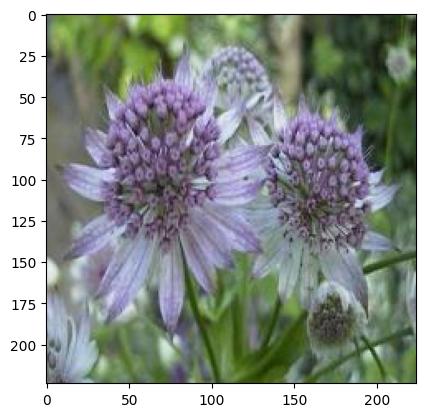

Изображение успешно открыто!


In [ ]:
import matplotlib.pyplot as plt

# Выберем случайную строку из DataFrame
random_row = df.sample(1)

# Получим имя изображения из этой строки
random_img_name = random_row[column_name].iloc[0]

# Получим номер класса из этой строки
random_img_class = random_row['class'].iloc[0]

print(f"Случайное имя изображения: {random_img_name}")
print(f"Номер класса этого изображения: {random_img_class}")

# Получаем имя класса по его идентификатору
random_img_class_name = flowers_dict[int(random_img_class)]
print(f"Название класса этого изображения: {random_img_class_name}")

# Построим путь к изображению
img_path = os.path.join(r'C:/Users/Admin/Desktop/Питон/Рекомендации1/oxford flowers 102.v1i.multiclass/test', f"image_{random_img_name}")

print(f"Путь к изображению: {img_path}")

# Попробуем открыть изображение
try:
    image = Image.open(img_path)
    plt.imshow(image)
    plt.show()
    print("Изображение успешно открыто!")
except FileNotFoundError:
    print("Файл не найден. Проверьте правильность пути к файлу и имени файла.")


In [ ]:
# Препроцессинг
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from PIL import Image
import torch
from torchvision.io import read_image
# Определение преобразований для тренировочного, валидационного и тестового наборов данных
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        # Extract the base filename without the extension
        base_filename = os.path.splitext(self.img_labels.loc[idx, 'filename'])[0]
        # Construct the full image path with the "image_" prefix
        img_path = os.path.join(self.img_dir, f"image_{base_filename}.jpg")
        image = Image.open(img_path).convert('RGB')
        label = self.img_labels.loc[idx, 'class']
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        else:
            label = torch.tensor(label, dtype=torch.long)

        return image, label

# Пути к папкам с данными и CSV-файлам
img_dir = "C:/Users/Admin/Desktop/Питон/Рекомендации1/oxford flowers 102.v1i.multiclass"
train_annotations_file = os.path.join(img_dir, 'train', 'labels_transformed1.csv')
valid_annotations_file = os.path.join(img_dir, 'valid', 'labels_transformed1.csv')
test_annotations_file = os.path.join(img_dir, 'test', 'labels_transformed1.csv')

# Создание экземпляров датасетов
train_dataset = CustomImageDataset(train_annotations_file, os.path.join(img_dir, 'train'), transform=data_transforms['train'])
valid_dataset = CustomImageDataset(valid_annotations_file, os.path.join(img_dir, 'valid'), transform=data_transforms['valid'])
test_dataset = CustomImageDataset(test_annotations_file, os.path.join(img_dir, 'test'), transform=data_transforms['test'])

# Создание даталоадеров
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Словарь dataloaders
dataloaders = {
    'train': train_dataloader,
    'valid': valid_dataloader,
    'test': test_dataloader
}

# Загрузка одного батча данных
images, labels = next(iter(dataloaders['train']))

# Проверка типа данных меток классов
print("Тип данных меток классов до преобразования:", labels.dtype)

# Преобразование меток классов в LongTensor
labels = labels.long()

# Проверка типа данных меток классов после преобразования
print("Тип данных меток классов после преобразования:", labels.dtype)

# Устройство, на котором будет выполняться обучение
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

Тип данных меток классов до преобразования: torch.int64
Тип данных меток классов после преобразования: torch.int64


Эпоха 1/25
----------
train Потери: 3.2064 Точность: 0.2713
valid Потери: 1.4392 Точность: 0.6093
Эпоха 2/25
----------
train Потери: 1.7298 Точность: 0.5651
valid Потери: 0.7686 Точность: 0.7780
Эпоха 3/25
----------
train Потери: 1.2531 Точность: 0.6789
valid Потери: 0.6021 Точность: 0.8274
Эпоха 4/25
----------
train Потери: 0.9947 Точность: 0.7499
valid Потери: 0.4874 Точность: 0.8714
Эпоха 5/25
----------
train Потери: 0.8469 Точность: 0.7838
valid Потери: 0.3703 Точность: 0.9037
Эпоха 6/25
----------
train Потери: 0.7484 Точность: 0.8067
valid Потери: 0.4195 Точность: 0.9076
Эпоха 7/25
----------
train Потери: 0.6756 Точность: 0.8291
valid Потери: 0.4041 Точность: 0.9086
Эпоха 8/25
----------
train Потери: 0.4850 Точность: 0.8832
valid Потери: 0.3065 Точность: 0.9330
Эпоха 9/25
----------
train Потери: 0.4090 Точность: 0.9022
valid Потери: 0.2778 Точность: 0.9399
Эпоха 10/25
----------
train Потери: 0.3514 Точность: 0.9176
valid Потери: 0.2749 Точность: 0.9379
Эпоха 11/25
-------

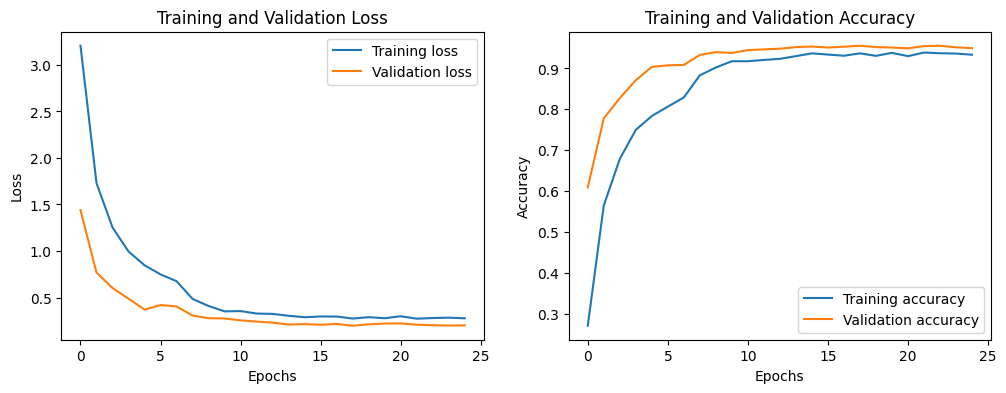

In [ ]:
import torch.optim as optim
from torch.optim import lr_scheduler
import copy
import matplotlib.pyplot as plt
from torchvision import models
from torchvision.models import resnet50, ResNet50_Weights

# Загрузка модели
model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

# Замена последнего слоя для классификации на 102 класса (количество классов в датасете Flowers102)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 102)

# Перемещение модели на доступное устройство (CPU или GPU)
model = model.to(device)

# Определение функции потерь
criterion = torch.nn.CrossEntropyLoss()

# Определение оптимизатора
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Определение планировщика скорости обучения
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Определение размеров датасетов
dataset_sizes = {
    'train': len(train_dataset),
    'valid': len(valid_dataset)
}

# Инициализация переменных для отслеживания лучшей модели
best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0

# Списки для хранения истории потерь и точности
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

num_epochs = 25  # Для отладки используем только 2 эпохи
for epoch in range(num_epochs):
    print(f'Эпоха {epoch+1}/{num_epochs}')
    print('-' * 10)

    for phase in ['train', 'valid']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)


        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Потери: {epoch_loss:.4f} Точность: {epoch_acc:.4f}')

        if phase == 'train':
            train_losses.append(epoch_loss)
            train_accuracies.append(epoch_acc.item())
            exp_lr_scheduler.step()


        else:
            valid_losses.append(epoch_loss)
            valid_accuracies.append(epoch_acc.item())

        if phase == 'valid' and epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = copy.deepcopy(model.state_dict())

# Загрузка лучших весов модели
model.load_state_dict(best_model_wts)
# Сохранение модели
torch.save(model.state_dict(), r'C:\Users\Admin\Desktop\Питон\Рекомендации1\model_weights.pth')

# Визуализация потерь и точности
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(valid_accuracies, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
# предикт в тензорах
inputs, classes = next(iter(valid_dataloader))

model = model.to(device)
inputs=inputs.to(device)

outputs=model(inputs)
_, preds = torch.max(outputs, 1)
preds=preds.cpu().numpy()
classes=classes.numpy()
print(preds)
print(classes)

[70 86 41 71]
[70 86 41 71]


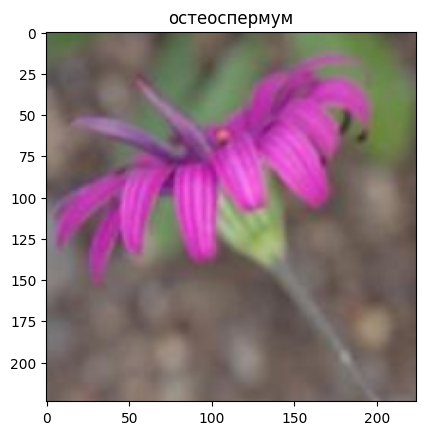

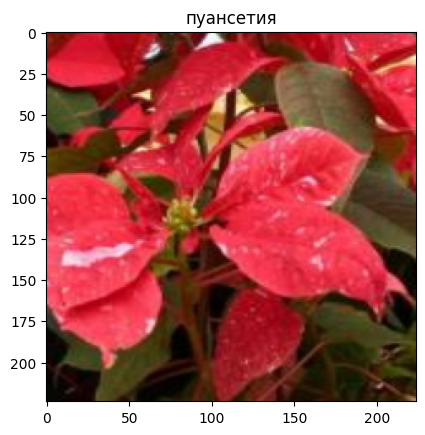

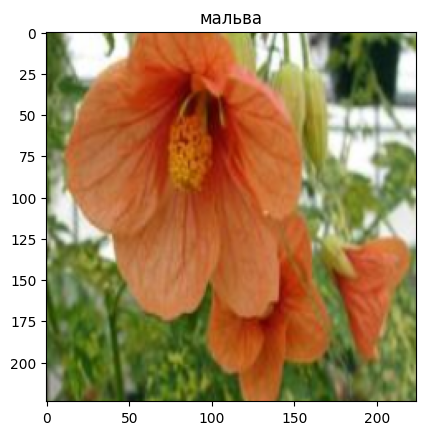

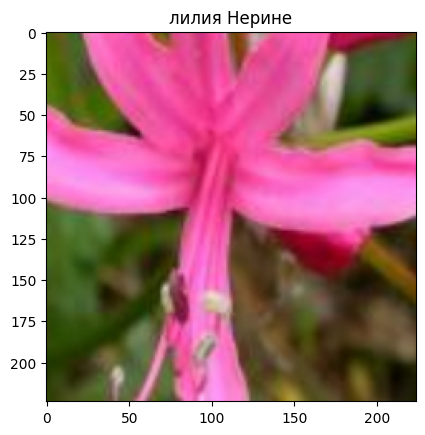

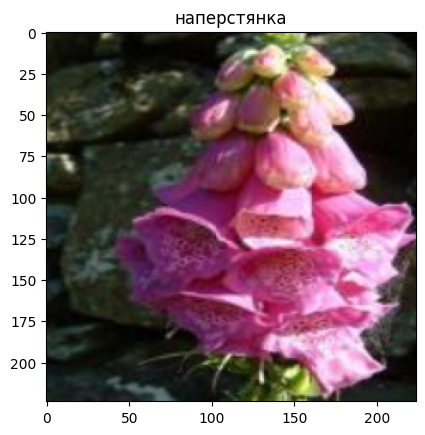

In [ ]:
# Предикт модели на тестовых данных (рэндомно выводим 5 штук)
import matplotlib.pyplot as plt
import numpy as np

def predict(model, dataloader):
    model.eval()  # Переводим модель в режим предсказания
    all_preds = []
    all_images = []
    for batch in dataloader:
        inputs = batch[0].to(device)
        with torch.no_grad():
            outputs = model(inputs)
            outputs = torch.nn.functional.softmax(outputs, dim=1)
            preds = torch.argmax(outputs, dim=1)
            preds = preds.cpu().numpy()
            all_preds.extend(preds)
            all_images.extend(inputs.cpu().numpy())
    return all_preds, all_images

test_preds, test_images = predict(model, train_dataloader)


def denormalize(image, mean, std):
    image = image.transpose((1, 2, 0))  # Преобразование из CxHxW в HxWxC
    image = std * image + mean  # Денормализация
    image = np.clip(image, 0, 1)  # Обрезка значений изображения в диапазоне [0, 1]
    return image

# Выбираем 5 случайных предсказаний для отображения
indices = np.random.choice(len(test_preds), 5)
for i in indices:
    image = denormalize(test_images[i], mean=np.array([0.485, 0.456, 0.406]), std=np.array([0.229, 0.224, 0.225]))
    plt.imshow(image)
    plt.title(flowers_dict_ru[test_preds[i]])
    plt.show()

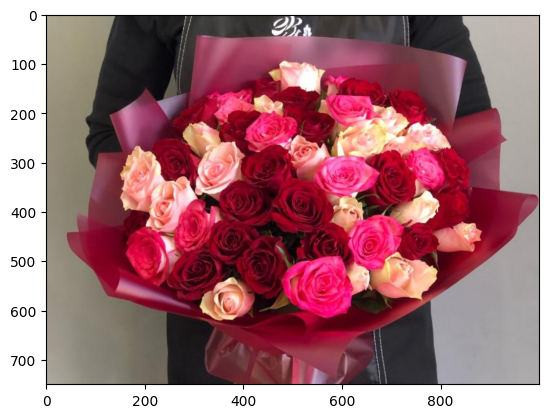

Путь к изображению: C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images\114395.jpg
Предсказанный класс: ('foxglove', 'наперстянка')
Уверенность предсказания: 0.9708961844444275


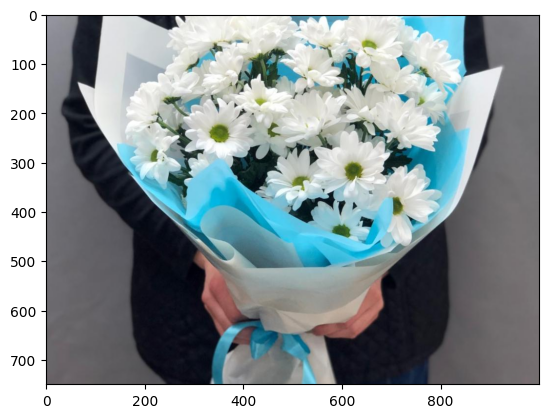

Путь к изображению: C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images\448257.jpg
Предсказанный класс: ('grape hyacinth', 'мышиный гиацинт')
Уверенность предсказания: 0.6581990718841553


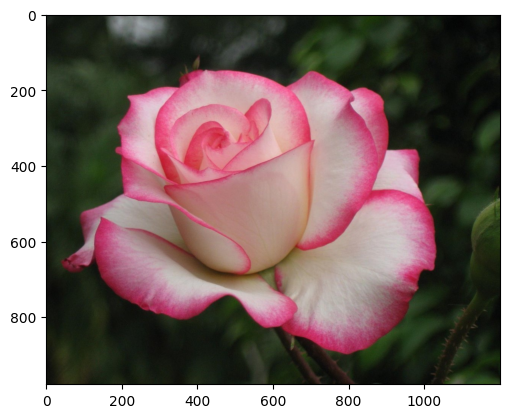

Путь к изображению: C:\Users\Admin\Desktop\Питон\Рекомендации1\rose.jpg
Предсказанный класс: ('rose', 'роза')
Уверенность предсказания: 0.9999951124191284


In [ ]:

def predict_image(model, image_path):
    model.eval()  # Переводим модель в режим предсказания
    image = Image.open(image_path)
    plt.imshow(image)
    plt.show()
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = transform(image).unsqueeze(0)
    image = image.to(device)
    with torch.no_grad():
        outputs = model(image)  # Используем переменную image вместо inputs
        probs = torch.nn.functional.softmax(outputs, dim=1)  # Преобразование выходных данных в вероятности
        preds = torch.argmax(outputs, dim=1)
        preds = preds.item()  # Получаем предсказанный класс в виде числа
        confidence = probs[0][preds].item()  # Получаем уверенность предсказания
    return preds, confidence

for image_path in image_paths:
    pred_id, confidence = predict_image(model, image_path)
    pred_name_ru = flowers_dict[pred_id]
    print(f'Путь к изображению: {image_path}')
    print(f'Предсказанный класс: {pred_name_ru}')
    print(f'Уверенность предсказания: {confidence}')

image_paths = [
    r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images\114395.jpg',
    r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images\448257.jpg',
    r'C:\Users\Admin\Desktop\Питон\Рекомендации1\rose.jpg',
]


## Мы видим, что цветы из датасета модель распознает хорошо (классификация, то есть, один цветок). Однако цветов из букетов в датасете нет, это первая проблема. Вторая - мы классифицируем одиночные цветы, а нам нужна детекция или сегментация, так как у нас букеты. ##
## План дальнейших действий: датасет одиночных цветов аугментируем (обрезка, ротация, мозаика). Так как у нас в датасете магазина всего 61 букет, распознаем букеты вручную. Расширяем словарь - фактически это разметка классификации вручную с дополнением новых классов. Расширяем датасет за счет наших букетов. Меняем OHE на многоклассовые.
##

In [ ]:
# В нашем датасете букетов есть нечитаемые файлы, отделяем их
import os
import shutil
from PIL import Image

# Путь к вашему датасету букетов
dataset_path = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images'

# Путь к папке, куда вы хотите переместить нечитаемые файлы
unreadable_path = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images1'

# Если папка для нечитаемых файлов еще не существует, создайте ее
if not os.path.exists(unreadable_path):
    os.makedirs(Flowers_images1_path)

# Пройдитесь по всем файлам в датасете
for filename in os.listdir(dataset_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        file_path = os.path.join(dataset_path, filename)
        try:
            # Попытайтесь открыть и прочитать файл
            with Image.open(file_path) as img:
                img.verify()
        except (IOError, SyntaxError) as e:
            # Если файл нечитаем, переместите его в папку для нечитаемых файлов
            shutil.move(file_path, os.path.join(unreadable_path, filename))


In [ ]:
import os
dataset_path = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images'
num_files = len([f for f in os.listdir(dataset_path) if os.path.isfile(os.path.join(dataset_path, f))])
print(f"Количество файлов в папке: {num_files}")

Количество файлов в папке: 121


In [ ]:
pip install imagehash


  Using cached ImageHash-4.3.1-py2.py3-none-any.whl (296 kB)
  Using cached pywavelets-1.5.0-cp310-cp310-win_amd64.whl.metadata (9.0 kB)
Using cached pywavelets-1.5.0-cp310-cp310-win_amd64.whl (4.3 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#А есть оли дубликаты?
import imagehash

dataset_path = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images'

hashes = {}
duplicates = []

for filename in os.listdir(dataset_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # добавьте другие форматы файлов при необходимости
        file_path = os.path.join(dataset_path, filename)
        with Image.open(file_path) as img:
            hash_code = imagehash.average_hash(img)
            if hash_code in hashes:
                print(f"Найден дубликат: {filename} дублирует {hashes[hash_code]}")
                duplicates.append(filename)
            else:
                hashes[hash_code] = filename

print(f"Общее количество дубликатов: {len(duplicates)}")
print(f"Имена файлов-дубликатов: {duplicates}")


Найден дубликат: 175939.jpg дублирует 101570.jpg
Найден дубликат: 192506.jpg дублирует 144334.jpg
Найден дубликат: 3037.jpg дублирует 109137.jpg
Найден дубликат: 311664.jpg дублирует 101570.jpg
Найден дубликат: 3824.jpg дублирует 344640.jpg
Найден дубликат: 448257.jpg дублирует 144334.jpg
Найден дубликат: 453640.jpg дублирует 144334.jpg
Найден дубликат: 466906.jpg дублирует 101570.jpg
Найден дубликат: 471869.jpg дублирует 205079.jpg
Найден дубликат: 479666.jpg дублирует 144334.jpg
Найден дубликат: 485878.jpg дублирует 470597.jpg
Найден дубликат: 510177.jpg дублирует 470597.jpg
Найден дубликат: 549020.jpg дублирует 101570.jpg
Найден дубликат: 556456.jpg дублирует 527732.jpg
Найден дубликат: 566445.jpg дублирует 250818.jpg
Найден дубликат: 567306.jpg дублирует 529928.jpg
Найден дубликат: 602952.jpg дублирует 101570.jpg
Найден дубликат: 608642.jpg дублирует 344640.jpg
Найден дубликат: 613993.jpg дублирует 144334.jpg
Найден дубликат: 628849.jpg дублирует 101570.jpg
Найден дубликат: 67202.j

In [ ]:
#Создадим для продолжения тренировки очищенный датасет
dataset_path = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images'
unique_images_path = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique'

if not os.path.exists(unique_images_path):
    os.makedirs(unique_images_path)

hashes = {}

for filename in os.listdir(dataset_path):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        file_path = os.path.join(dataset_path, filename)
        with Image.open(file_path) as img:
            hash_code = imagehash.average_hash(img)
            if hash_code not in hashes:
                hashes[hash_code] = filename
                shutil.copy(file_path, unique_images_path)

print(f"Количество уникальных изображений: {len(hashes)}")

Количество уникальных изображений: 64


In [ ]:
import pandas as pd

# Загружаем данные из CSV файла
df = pd.read_csv('your_file.csv')

# Создаем словарь с новыми классами
new_classes = {
    'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique\\3246.jpg': 'ромашковая хризантема бакарди',
    'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\Flowers_images_unique\\61289.jpg': 'роза пич аваланж',
    # добавьте сюда другие классы при необходимости
}

# Добавляем новые столбцы для новых классов
for class_name in set(new_classes.values()):
    df[class_name] = 0

# Обновляем значения для новых классов
for image_path, class_name in new_classes.items():
    df.loc[df['image_path'] == image_path, class_name] = 1

# Сохраняем обновленные данные в CSV файл
df.to_csv('updated_labels.csv', index=False)


# Сохраняем обновленные данные в CSV файл
df.to_csv('updated_labels.csv', index=False)

'''
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\101570.jpg': класс 73 'роза',
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\109137.jpg': класс новый 'роза пионовидная',
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\109192.jpg': класс новый 'ель', "новогодняя композиция в ящике",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\109456.jpg': класс 73 'роза',
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\114395.jpg': класс 73 'роза',
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\119863.jpg': класс новый 'ромашковая хризантема бакарди',
класс новый 'статица', класс 40 'гербера',
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\144334.jpg': класс новый 'ромашковая хризантема бакарди',
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\149823.jpg': класс 40 'гербера',
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\154906.jpg': класс новый 'роза чайно-гибридная', новый "декоративная капуста крейн"
", новый "хризантема кустоая", класс 93 "наперстянка"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\165432.jpg': класс 73 "роза"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\175097.jpg': класс новый, "голубая гортензия"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\187305.jpg': класс 40 "гербера", класс новый "кустовая хризантема",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\196693.jpg': класс новый "амариллис", класс новый "виноград", класс новый "гиперикум"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\205079.jpg': класс 73 "роза"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\206449.jpg': класс 73 "роза"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\250818.jpg': класс новый "голубая хризантема чапек", класс 40 "гербера", класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\296269.jpg': класс новый "пион", класс новый "лещина", класс новый "хризантема кустовая",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\3246.jpg': класс новый 'ромашковая хризантема бакарди',
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\331727.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\344640.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\454851.jpg': класс новый "роза пионовидная",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\462240.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\465232.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\470597.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\471936.jpg': класс 73 "роза", класс новый "орхидея цимбидиум",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\472669.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\504474.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\523495.jpg': класс новый "гипсофила белая"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\525356.jpg': класс 73 "роза", класс 101 "ирис", класс новый "хризантема кустовая"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\526313.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\527732.jpg': класс 73 "роза", класс новый "хризантема шаровидная"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\529928.jpg': класс 73 "роза", класс 40 "гербера", класс новый "орхидея цимбидиум",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\539892.jpg': класс 73 "роза", класс новый "пион",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\552334.jpg': класс 73 "роза", класс новый "орхидея цимбидиум", класс новый "лагурус"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\596567.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\599515.jpg': класс 40 "гербера", класс 73 "роза", класс новый "альстремерия", класс новый "хризантема кустовая",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\61289.jpg': класс новый 'роза пич аваланж',
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\625470.jpg': класс 40 "гербера",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\636358.jpg': класс новый "роза пич аваланж",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\637511.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\652169.jpg': клас 73 "роза", класс 40 "гербера", класс новый "пион"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\653618.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\660868.jpg': класс 73 "роза", класс новый "хризантема кустовая"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\662828.jpg': класс новый "ель", класс "новогодняя композиция"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\682640.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\71912.jpg': класс 73 'роза',
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\71929.jpg': класс новый 'роза фредерик мистраль',
класс новый "хризантема белая фигаро"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\755752.jpg': класс новый "хризантема желтая"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\80848.jpg': класс новый 'роза пинк мондиаль',
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\816675.jpg':класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\834439.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\846819.jpg': класс 73 "роза", класс новый "пион",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\856423.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\857632.jpg': класс 73 "роза", класс новый "хризантема кустовая", класс новый "пион"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\863004.jpg': класс 40 "гебера"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\866393.jpg': класс новый "гипсофила голубая"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\867508.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\872258.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\880292.jpg': класс 73 "роза", класс новый "пшеница"
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\937883.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\947590.jpg': класс 73 "роза",
r'C:\Users\Admin\Desktop\Питон\Рекомендации1\Flowers_images_unique\955949.jpg': класс 73 "роза".



In [ ]:
# новый словарь для букетов

flowers_new_dict = {
    118: 'ель',
    119: 'новогодняя композиция',
    102: 'ромашковая хризантема бакарди',
    103: 'статица',
    112: 'декоративная капуста крейн',
    110: 'хризантема кустовая',
    104: 'голубая гортензия',
    106: 'амариллис',
    107: 'виноград',
    113: 'гиперикум',
    111: 'голубая хризантема чапек',
    105: 'пион',
    109: 'лещина',
    108: 'орхидея цимбидиум',
    116: 'гипсофила белая',
    115: 'хризантема шаровидная',
    118: 'орхидея цимбидиум',
    120: 'лагурус',
    116: 'альстремерия',
    121: 'фисташка',
    114: 'гипсофила голубая',
    117: 'пшеница',
    122: 'персик',
    123: 'яблоко',
    124: 'лаванда'

}



In [ ]:
# словарь для разметки
images_dict = {
    '101570.jpg': 73,
    '109137.jpg': 102,
    '109192.jpg': (103, 104),
    '109456.jpg': 73,
    '114395.jpg': 73,
    '119863.jpg': (105, 106, 40),
    '144334.jpg': 105,
    '149823.jpg': 40,
    '154906.jpg': (107, 108, 109, 93),
    '165432.jpg': 73,
    '175097.jpg': 110,
    '187305.jpg': (40, 109),
    '196693.jpg': (111, 112, 113),
    '205079.jpg': 73,
    '206449.jpg': 73,
    '250818.jpg': (114, 40, 73),
    '296269.jpg': (115, 116, 109),
    '3246.jpg': 105,
    '331727.jpg': 73,
    '344640.jpg': 73,
    '454851.jpg': 102,
    '462240.jpg': 73,
    '465232.jpg': 73,
    '470597.jpg': 73,
    '471936.jpg': (73, 117),
    '472669.jpg': 73,
    '504474.jpg': 73,
    '523495.jpg': 118,
    '525356.jpg': (73, 101, 109),
    '526313.jpg': 73,
    '527732.jpg': (73, 119),
    '529928.jpg': (73, 40, 120),
    '539892.jpg': (73, 115),
    '552334.jpg': (73, 120, 121),
    '596567.jpg': 73,
    '599515.jpg': (40, 73, 122, 109),
    '61289.jpg': 123,
    '625470.jpg': 40,
    '636358.jpg': 123,
    '637511.jpg': 73,
    '652169.jpg': (73, 40, 115),
    '653618.jpg': 73,
    '660868.jpg': (73, 109),
    '662828.jpg': (103, 104),
    '682640.jpg': 73,
    '71912.jpg': 73,
    '71929.jpg': (124, 125),
    '755752.jpg': 126,
    '80848.jpg': 73,
    '816675.jpg': 73,
    '834439.jpg': 73,
    '846819.jpg': (73, 115),
    '856423.jpg': 73,
    '857632.jpg': (73, 109, 115),
    '863004.jpg': 40,
    '866393.jpg': 128,
    '867508.jpg': 73,
    '872258.jpg': 73,
    '880292.jpg': (73, 129),
    '937883.jpg': 73,
    '947590.jpg': 73,
    '955949.jpg': 73
}

In [ ]:
import os
# составим список файлов в новом датасете, который состоит из изображений цветов, указанных в изображениях тв датасете заказчика.

folder_path = r"C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\train1"

# Получение списка всех файлов в папке
file_names = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# список file_names для создания первой колонки в новом CSV для разметки
print(file_names, len(file_names))

['alstromeria_1160.jpg', 'alstromeria_11601.jpg', 'alstromeria_11602.jpg', 'alstromeria_11603.jpg', 'alstromeria_1162.jpg', 'alstromeria_1163.jpg', 'alstromeria_1164.jpg', 'alstromeria_1165.jpg', 'alstromeria_1166.jpg', 'alstromeria_1167.jpg', 'alstromeria_1168.jpg', 'alstromeria_1169.jpg', 'amaril_1060.jpeg', 'amaril_1062.jpeg', 'amaril_1063.jpg', 'amaril_1064.jpg', 'amaril_1065.jpg', 'amaril_1066.jpg', 'amaril_1067.jpg', 'apple_1230.jpeg', 'apple_1231.jpeg', 'apple_1232.jpeg', 'apple_1233.jpeg', 'apple_1234.jpeg', 'chrysant_bakardi_1021.jpeg', 'chrysant_bakardi_1023.jpg', 'chrysant_bakardi_1024.jpg', 'chrysant_bakardi_10501.jpg', 'chrysant_bakardi_1056.jpg', 'chrysant_bakardi_1059.jpg', 'chrys_blue_1110.jpg', 'chrys_blue_11101.jpg', 'chrys_blue_1111.jpg', 'chrys_blue_1112.jpg', 'chrys_blue_1113.jpg', 'chrys_blue_1114.jpg', 'chrys_blue_1115.jpg', 'chrys_blue_1116.jpg', 'chrys_blue_1117.jpg', 'chrys_blue_1118.jpg', 'chrys_blue_1119.jpg', 'chrys_bush_1100.jpg', 'chrys_bush_1101.jpg', 'c

In [ ]:
#делаем разметку
import pandas as pd
import os

import pandas as pd
import os

# Путь к папке с изображениями
image_folder = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\train1'

# Получаем список всех файлов в папке
file_names = os.listdir(image_folder)

# Создаем DataFrame с именами файлов в первой колонке и нулями в остальных
df_new = pd.DataFrame(0, index=file_names, columns=range(1, 125))

# Извлекаем классы из имен файлов и ставим 1 в соответствующей колонке
for file_name in file_names:
    digits = ''.join(filter(str.isdigit, file_name))[:3]  # Извлекаем первые 3 цифры из имени файла
    if digits:  # Проверяем, что строка не пустая
        class_name = int(digits)
        df_new.loc[file_name, class_name] = 1

# Сохраняем DataFrame в CSV файл
df_new.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\train1\new_classes.csv')


In [ ]:
#Проверяем, сколько получилось изображений на класс
# Загружаем DataFrame из CSV файла
df_new = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\train1\new_classes.csv', index_col=0)

# Преобразуем имена столбцов в int
df_new.columns = df_new.columns.astype(int)

# Оставляем только колонки от 102 до 124
df_new = df_new.loc[:, 102:124]

# Считаем количество единиц в каждой колонке (классе)
class_counts = df_new.sum()

# Выводим количество изображений для каждого класса
for class_name, count in class_counts.items():
    print(f"Класс {class_name}: {count} изображений")


Класс 102: 3 изображений
Класс 103: 3 изображений
Класс 104: 14 изображений
Класс 105: 17 изображений
Класс 106: 23 изображений
Класс 107: 7 изображений
Класс 108: 11 изображений
Класс 109: 10 изображений
Класс 110: 9 изображений
Класс 111: 11 изображений
Класс 112: 12 изображений
Класс 113: 12 изображений
Класс 114: 0 изображений
Класс 115: 10 изображений
Класс 116: 12 изображений
Класс 117: 10 изображений
Класс 118: 3 изображений
Класс 119: 0 изображений
Класс 120: 12 изображений
Класс 121: 10 изображений
Класс 122: 6 изображений
Класс 123: 5 изображений
Класс 124: 0 изображений


In [ ]:
from sklearn.model_selection import train_test_split

# Разбиваем данные на обучающий и тестовый наборы
df_train1, df_test1 = train_test_split(df_new, test_size=0.2, random_state=42)

print(f"Размер обучающего набора: {len(df_train1)}")
print(f"Размер тестового набора: {len(df_test1)}")

# Путь к папке с обучающими изображениями
train_folder = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\train1\\'

# Путь к папке с тестовыми изображениями
test_folder = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\test1\\'

# Сохраняем обучающий и тестовый наборы данных в CSV файлы
df_train1.to_csv(os.path.join(train_folder, 'train1_classes.csv'))
df_test1.to_csv(os.path.join(test_folder, 'test1_classes.csv'))


Размер обучающего набора: 160
Размер тестового набора: 41


In [ ]:
import shutil
import os
# Имиджи забыла переместить Список файлов для перемещения
files_to_move = [
    'frape_gerbera_gort_1074.jpg',
    '1063.jpg',
    'alstromeria_1168.jpg',
    'peach_122.jpeg',
    'lagurus_1206.jpg',
    'hypericum_1135.jpg',
    'chrys_bush_chrys_bakardi_1104.jpg',
    'pion_1057.jpeg',
    'pistascio_1212.jpg',
    'chrysant_bakardi_1023.jpg',
    'chrys_bush_1106.jpg',
    'statitsa_1060.jpg',
    'pion_1051.jpeg',
    'chrys_spheric_1158.jpg',
    'statitsa_1065.jpg',
    'pistascio_1215.jpg',
    'chrys_blue_1115.jpg',
    'orchid_c_1084.jpeg',
    'crane_11202.jpg',
    'chrys_bush_1109.jpg',
    'lagurus_1202.jpg',
    '1065.jpg',
    'orchid_c_10801.jpeg',
    'fir_1181.jpg',
    'chrys_bush_1105.jpg',
    'chrys_blue_1119.jpg',
    'crane_1122.jpg',
    'chrys_bush_1108.jpg',
    'lagurus_1203.jpg',
    'leschina_1090.jpg',
    '1054.jpg',
    '1068.jpg',
    'chrys_blue_1114.jpg',
    'chrys_spheric_1155.jpg',
    'orchid_c_1082.jpeg',
    'grape_1073.jpg',
    'leschina_1093.jpg',
    'leschina_1095.jpg',
    'pion_1050.jpeg',
    'chrys_spheric_1156.jpg',
    'chrys_spheric_1159.jpg'
]

# Путь к исходной и целевой директориям
source_dir = 'C:/Users/Admin/Desktop/Питон/Рекомендации1/oxford flowers 102.v1i.multiclass/train1'
target_dir = 'C:/Users/Admin/Desktop/Питон/Рекомендации1/oxford flowers 102.v1i.multiclass/test1'

# Перемещение файлов
for filename in files_to_move:
    source_path = os.path.join(source_dir, filename)
    target_path = os.path.join(target_dir, filename)

    # Проверка, существует ли файл в исходной директории
    if os.path.exists(source_path):
        shutil.move(source_path, target_path)
    else:
        print(f"File {filename} does not exist in the source directory.")


File 1063.jpg does not exist in the source directory.
File alstromeria_1168.jpg does not exist in the source directory.
File peach_122.jpeg does not exist in the source directory.
File lagurus_1206.jpg does not exist in the source directory.
File hypericum_1135.jpg does not exist in the source directory.
File chrys_bush_chrys_bakardi_1104.jpg does not exist in the source directory.
File pion_1057.jpeg does not exist in the source directory.
File pistascio_1212.jpg does not exist in the source directory.
File chrysant_bakardi_1023.jpg does not exist in the source directory.
File chrys_bush_1106.jpg does not exist in the source directory.
File statitsa_1060.jpg does not exist in the source directory.
File pion_1051.jpeg does not exist in the source directory.
File chrys_spheric_1158.jpg does not exist in the source directory.
File statitsa_1065.jpg does not exist in the source directory.
File pistascio_1215.jpg does not exist in the source directory.
File chrys_blue_1115.jpg does not exi

In [ ]:
import pandas as pd

# Загрузка CSV-файла с аннотациями
annotations = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\train1\train1_classes.csv')

#первое значение в DataFrame пустое и его нужно заменить на 'filename'
annotations.columns.values[0] = 'filename'

# Сохранение изменений в CSV-файл
annotations.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\train1\train1_classes.csv', index=False)


# Загрузка CSV-файла с аннотациями
annotations = pd.read_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\test1\test1_classes.csv')

#первое значение в DataFrame пустое и его нужно заменить на 'filename'
annotations.columns.values[0] = 'filename'

# Сохранение изменений в CSV-файл
annotations.to_csv(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\test1\test1_classes.csv', index=False)



PermissionError: [Errno 13] Permission denied: 'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\oxford flowers 102.v1i.multiclass\\test1\\test1_classes.csv'

In [ ]:
# Препроцессинг нового датасета
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import os
from PIL import Image
import torch
from torchvision.io import read_image
# Определение преобразований для тренировочного, валидационного и тестового наборов данных
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        # Extract the base filename without the extension
        base_filename = os.path.splitext(self.img_labels.loc[idx, 'filename'])[0]
        # Construct the full image path with the "image_" prefix
        img_path = os.path.join(self.img_dir, f"image_{base_filename}.jpg")
        image = Image.open(img_path).convert('RGB')
        label = self.img_labels.loc[idx, 'class']
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        else:
            label = torch.tensor(label, dtype=torch.long)

        return image, label


# Пути к папкам с данными и CSV-файлам
train_img_dir = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\train1'
test_img_dir = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\oxford flowers 102.v1i.multiclass\test1'
train_annotations_file = os.path.join(train_img_dir, 'train1_classes.csv')
test_annotations_file = os.path.join(test_img_dir, 'test1_classes.csv')

# Создание экземпляров датасетов
train_dataset = CustomImageDataset(train_annotations_file, train_img_dir, transform=data_transforms['train'])
test_dataset = CustomImageDataset(test_annotations_file, test_img_dir, transform=data_transforms['test'])

# Создание даталоадеров
train_dataloader = DataLoader(train_dataset, batch_size=4, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=4, shuffle=False)

# Словарь dataloaders
dataloaders = {
    'train': train_dataloader,
    'test': test_dataloader
}

# Загрузка одного батча данных
images, labels = next(iter(dataloaders['train']))

# Проверка типа данных меток классов
print("Тип данных меток классов до преобразования:", labels.dtype)

# Преобразование меток классов в LongTensor
labels = labels.long()

# Проверка типа данных меток классов после преобразования
print("Тип данных меток классов после преобразования:", labels.dtype)

# Устройство, на котором будет выполняться обучение
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Desktop\\Питон\\Рекомендации1\\oxford flowers 102.v1i.multiclass\\train1\\image_orchid_c_1085.jpg'

In [ ]:
#Создание модели, веса берем обученные
from torchvision.models import resnet50

# Загрузка модели
model = resnet50(pretrained=False)

# Загрузка предварительно обученных весов
weights_path = r'C:\Users\Admin\Desktop\Питон\Рекомендации1\model_weights.pth'
model.load_state_dict(torch.load(weights_path))

# Замена последнего слоя для классификации на 22 класса
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 22)

# Перемещение модели на доступное устройство (CPU или GPU)
model = model.to(device)

# Определение функции потерь
criterion = torch.nn.CrossEntropyLoss()

# Определение оптимизатора
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Определение планировщика скорости обучения
exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

# Определение размеров датасетов
dataset_sizes = {
    'train': len(train_dataset),
    'valid': len(valid_dataset)
}

# Инициализация переменных для отслеживания лучшей модели
best_model_wts = copy.deepcopy(model.state_dict())
best_acc = 0.0

# Списки для хранения истории потерь и точности
train_losses = []
valid_losses = []
train_accuracies = []
valid_accuracies = []

num_epochs = 25  # Для отладки используем только 2 эпохи
for epoch in range(num_epochs):
    print(f'Эпоха {epoch+1}/{num_epochs}')
    print('-' * 10)

    for phase in ['train', 'valid']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)


        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Потери: {epoch_loss:.4f} Точность: {epoch_acc:.4f}')

        if phase == 'train':
            train_losses.append(epoch_loss)
            train_accuracies.append(epoch_acc.item())
            exp_lr_scheduler.step()


        else:
            valid_losses.append(epoch_loss)
            valid_accuracies.append(epoch_acc.item())

        if phase == 'valid' and epoch_acc > best_acc:
            best_acc = epoch_acc
            best_model_wts = copy.deepcopy(model.state_dict())

# Загрузка лучших весов модели
model.load_state_dict(best_model_wts)
# Сохранение модели
torch.save(model.state_dict(), r'C:\Users\Admin\Desktop\Питон\Рекомендации1\model_weights.pth')

# Визуализация потерь и точности
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training loss')
plt.plot(valid_losses, label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training accuracy')
plt.plot(valid_accuracies, label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


## Далее код не дописан! Далее идет шаблон, который я делала для датасета магазина живых цветов. План - после выявления названий цветов, мы предложим букеты по сезону и к сезонным правздникам, также наш код позволит автоматически относить букет к категории, уже установленной заказвиком. Для хородного старта - сезонные букеты, для повторных - сезорнные букеты плюс похожие букеты (сходство - класс цветов илди цветовая гамма).
## Сопутствующие товары - рекомендации для корзины - используем метод mlxtend.frequent_pattern (библиотека Априори), но! в настоящий момент сопутствующие товары - это мишки, шары, топинги. Мишки не могут предлагаться в корзине, так как это чаще всего одноразовый подарок. Шары и топинги это всего 2 единицы, для этого не требуется вообще модель, они просто выставляются в рекомендации по умолчанию. Надо также топинги просто с сердечком, с солнышком, звездой, универсальные, можно также добавить суперупаковку по цвету, открытку-вкладыш, шоколадку по цвету.

### Рекомендация "Букеты сезона" #

In [ ]:
#посмотрим, что у нас имеется в описании товара (цветков)
import IPython.display

def display_left_aligned_column(newdata, column_name):
    newdata_temp = newdata[[column_name]].copy()
    newdata_temp[column_name] = newdata_temp[column_name].apply(lambda x: f'<div style="text-align:left">{x}</div>')
    html_table = newdata_temp.to_html(notebook=True, escape=False)
    IPython.display.display(IPython.display.HTML(html_table))

# Вызов функции для столбца 'Description'
display_left_aligned_column(newdata, 'Description')


,Description
0,"Perfect as a grown cover, the flowers resemble blue stars."
1,"Known for their resemblance to bells, these flowers come in many sizes and varieties."
2,A highly recognized flower which has bright colors and a strong scent.
3,"Great as a cut flower, they come in every color of the rainbow and can grow up to 20 inches tall."
4,A highly recognized flower which has bright colors and a strong scent.
5,Over 100 species of rose exist along with almost any color a person can think of. Check out our�Meaning of Rose Colors�article for more information.
6,"Known for their resemblance to bells, these flowers come in many sizes and varieties."
7,"Large blooms in vibrant colors that attract butterflies, bees and hummingbirds."
8,"Named for its red colored sap that flows from the stem when cut, it was originally used as war paint by Native Americans."
9,Over 100 species of rose exist along with almost any color a person can think of. Check out our�Meaning of Rose Colors�article for more information.


In [ ]:
#посмотрим, что у нас имеется в описании сезона, они цветут в формате 2 лимитов начала (ранняя весна, середина весны
# и лимита окончания - ранняя осень, середина осени
def display_left_aligned_column(newdata, column_name):
    newdata_temp = newdata[[column_name]].copy()
    newdata_temp[column_name] = newdata_temp[column_name].apply(lambda x: f'<div style="text-align:left">{x}</div>')
    html_table = newdata_temp.to_html(notebook=True, escape=False)
    IPython.display.display(IPython.display.HTML(html_table))

# Вызов функции для столбца 'Season'
display_left_aligned_column(newdata, 'Season')


,Season
0,Blooms in mid-spring to mid-fall.
1,Blooms in early�summer�to�early�fall.
2,Blooms in spring to early fall.
3,Blooms in spring
4,Blooms in spring to early fall.
5,Blooms in�late spring�to early fall.
6,Blooms in early�summer�to�early�fall.
7,Blooms in mid-summer to mid-fall.
8,Blooms in early spring.
9,Blooms in�late spring�to early fall.


In [ ]:
newdata[:4]

,Name,Description,Needs,Season,Status,Date,Client Name,Client ID,Item ID,sales_rank
0,PERIWINKLE,"Perfect as a grown cover, the flowers resemble blue stars.",Needs droughty.,Blooms in mid-spring to mid-fall.,Sold,"Apr. 14, 2016",Erin Moon,0,0,6
1,BELLFLOWER,"Known for their resemblance to bells, these flowers come in many sizes and varieties.",Needs well-drained soil.,Blooms in early�summer�to�early�fall.,Sold,"Apr. 17, 2016",Gracie Chung,1,1,20
2,LILY,A highly recognized flower which has bright colors and a strong scent.,Needs well-drained soil.,Blooms in spring to early fall.,Sold,"Apr. 19, 2016",Josephine Pham,2,2,17
3,TULIP,"Great as a cut flower, they come in every color of the rainbow and can grow up to 20 inches tall.",Needs well-drained soil,Blooms in spring,Sold,"Apr. 23, 2016",Alex Edwards,3,3,11


In [ ]:
# "Цветы сезона" - логика - перевод значения колонки сезон в стандартизированные категории
# распределение месячцев года по этим категориям, включая зиму (относим к ранней весне, покупка заранее)
# соотнесение с текущим временем щахода любого пользователя, предложение цветов сезона.
#К примеру, сейчас, в январе 2024, цветок сезона это сегвенария и фиалка.

import pandas as pd
from datetime import datetime
# Функция для определения сезона по месяцу
# Функция для определения сезона по месяцу
def get_season(month):
    if month in [12, 1, 2]:
        return 'early spring'
    elif month in [3, 4]:
        return 'mid spring'
    elif month in [5, 6, 7]:
        return 'early fall'
    elif month in [8, 9]:
        return 'mid fall'
    else:
        return 'other'

# Функция для преобразования сезонов в унифицированные категории
def standardize_season(season):
    if 'early spring' in season:
        return 'early spring'
    elif 'mid spring' in season:
        return 'mid spring'
    elif 'early fall' in season:
        return 'early fall'
    elif 'mid fall' in season:
        return 'mid fall'
    else:
        return 'other'

# Применение функции к датасету
newdata['Season'] = newdata['Season'].str.replace('Blooms in ', '').str.lower()
newdata['Standardized Season'] = newdata['Season'].apply(standardize_season)

# Предполагаем, что текущий месяц - это месяц сейчас
current_month = datetime.now().month
current_season = get_season(current_month)


# Фильтрация цветов в соответствии с текущим сезоном
recommended_seasonal_flowers = newdata[newdata['Standardized Season'] == current_season]['Name'].unique()

# Вывод рекомендуемых цветов
print(', '.join(recommended_seasonal_flowers))

BLOODROOT, VIOLET


**Итак, на сегодня, январь 2024 года цветы сезона - сангвинария и фиалка.**

In [ ]:
# Предполагаем, что текущий месяц - май
current_month = 5
current_season = get_season(current_month)

# Фильтрация цветов в соответствии с текущим сезоном
recommended_seasonal_flowers = newdata[newdata['Standardized Season'] == current_season]['Name'].unique()

# Вывод рекомендуемых цветов
print(', '.join(recommended_seasonal_flowers))


LILY, ROSE


In [ ]:
# функция для сборщика
def get_seasonal_flowers():
    # Получение текущего месяца
    current_month = datetime.now().month
    # Определение сезона
    current_season = get_season(current_month)
    # Фильтрация цветов в соответствии с текущим сезоном
    recommended_seasonal_flowers = newdata[newdata['Standardized Season'] == current_season]['Name'].unique()
    # Возвращение рекомендованных цветов
    return ', '.join(recommended_seasonal_flowers)


In [ ]:
#Вывод рекомендаций через функцию
print(get_seasonal_flowers())

BLOODROOT, VIOLET


### Рекомендации по описаниям цветов. #

In [ ]:
def get_client_id(client_name):
    return newdata[newdata['Client Name'] == client_name]['Client ID'].values[0]


In [ ]:
import pandas as pd

# Функция для классификации цветов по описаниям
def classify_flower(description, name):
    description = description.lower()
    if name == 'Bloodroot':
        return 'Group 3: Other Flowers'
    elif 'rose' in description or 'highly recognized' in description:
        return 'Group 1: Famous Flowers and Roses'
    elif 'cut' in description or 'bouquet' in description:
        return 'Group 2: Flowers for Bouquets'
    else:
        return 'Group 3: Other Flowers'

# Применение функции к датафрейму
newdata['Flower Group'] = newdata.apply(lambda row: classify_flower(row['Description'], row['Name']), axis=1)

# Создание DataFrame с историей покупок клиентов и их предпочтениями
client_purchases = newdata[['Client Name', 'Name', 'Flower Group']].dropna()
print(client_purchases)
# Группировка данных по клиентам и их предпочтениям в группах цветов
client_preferences = client_purchases.groupby('Client Name')['Flower Group'].apply(lambda x: list(set(x))).reset_index()

def recommend_classified_flowers(client_name):
    # Получаем предпочтения клиента
    preferred_groups = client_preferences[client_preferences['Client Name'] == client_name]['Flower Group'].values[0]

    # Удаляем группу 3 из предпочтений, если она там есть
    if 'Group 3: Other Flowers' in preferred_groups:
        preferred_groups.remove('Group 3: Other Flowers')

    # Если у клиента не осталось предпочтений, возвращаем пустой список
    if not preferred_groups:
        return []

    # Выбираем цветы из оставшихся групп, исключая 'Bloodroot'
    recommended_classified_flowers = newdata[(newdata['Flower Group'].isin(preferred_groups)) & (newdata['Name'] != 'BLOODROOT')]['Name'].unique()

    return recommended_classified_flowers

# Пример использования функции
client_name = 'Gracie Chung'
recommendations_for_client = recommend_classified_flowers(client_name)
print(recommendations_for_client)


        Client Name        Name                       Flower Group
0         Erin Moon  PERIWINKLE             Group 3: Other Flowers
1      Gracie Chung  BELLFLOWER             Group 3: Other Flowers
2    Josephine Pham        LILY  Group 1: Famous Flowers and Roses
3      Alex Edwards       TULIP      Group 2: Flowers for Bouquets
4     Izaiah Levine        LILY  Group 1: Famous Flowers and Roses
..              ...         ...                                ...
101  Yahir Holloway        ROSE  Group 1: Famous Flowers and Roses
102      Eva Garcia       TULIP      Group 2: Flowers for Bouquets
103    Dalia Harper  BELLFLOWER             Group 3: Other Flowers
104       Erin Moon      VIOLET             Group 3: Other Flowers
105    Alex Edwards        ROSE  Group 1: Famous Flowers and Roses

[106 rows x 3 columns]
['LILY' 'ROSE']


In [ ]:
print(recommendations_for_client.shape)

(2,)


In [ ]:
# Функция для сборщика
def get_recommend_classified_flowers(client_name):
    # Получаем предпочтения клиента
    preferred_groups = client_preferences[client_preferences['Client Name'] == client_name]['Flower Group'].values[0]
    print(preferred_groups)

    # Удаляем группу 3 из предпочтений, если она там есть
    if 'Group 3: Other Flowers' in preferred_groups:
        preferred_groups.remove('Group 3: Other Flowers')
    print(preferred_groups)

    # Если у клиента не осталось предпочтений, возвращаем пустой список
    if not preferred_groups:
        return []

    # Выбираем цветы из оставшихся групп, исключая 'Bloodroot'
    classified_flowers = newdata[(newdata['Flower Group'].isin(preferred_groups)) & (newdata['Name'] != 'Bloodroot')]['Name'].unique()

    return classified_flowers


In [ ]:
# проверка функции для сборщика
print(get_recommend_classified_flowers('Alex Edwards'))


['Group 1: Famous Flowers and Roses', 'Group 2: Flowers for Bouquets']
['Group 1: Famous Flowers and Roses', 'Group 2: Flowers for Bouquets']
['LILY' 'TULIP' 'ROSE' 'BLOODROOT']


In [ ]:
# проверка функции для сборщика
print(get_recommend_classified_flowers('Gracie Chung'))


['Group 1: Famous Flowers and Roses']
['Group 1: Famous Flowers and Roses']
['LILY' 'ROSE']


То есть, Алексу будет предложено 4 вида цветов, а Грейси 2.

Кроме того, для продакшена надо будет объединить все функции рекомендаций в одну, а также включить туда функцию, которая определит, новый это пользователь или повторный. Как вариант, можно будет также дополнить функцией распределения на группы изображений этих цветов (группа ярких, группа пастельных, группа многоцветных). В нашем датасете изображений нет, так как это у нас шаблон, то в перспективе дополним изображеничми из интернета.

**Функция n top позволяет ограничить число рекомендаций, основываясь на критериях. В нашем случае это более высокий рейтинг в количестве продаж**

In [ ]:
def recommend_flowers(client_name, n_top=2):
    # Получаем сезонные цветы
    seasonal_flowers = get_season_flowers()
    print("Seasonal flowers: ", seasonal_flowers)

    # Проверяем, есть ли клиент в матрице и в группах 1 и 2
    matrix_client_id = get_client_id(client_name)  # Используем get_client_id вместо get_client_index
    user_recommendations = get_similar_item_recommendations(matrix_client_id)
    print("User recommendations: ", user_recommendations)

    if (user_recommendations == "Пользователь не найден в матрице").any():
        recommended_flowers = list(seasonal_flowers)
    else:
        in_group_1_or_2 = 'Group 1: Famous Flowers and Roses' in client_preferences[client_preferences['Client Name'] == client_name]['Flower Group'].values[0] or 'Group 2: Flowers for Bouquets' in client_preferences[client_preferences['Client Name'] == client_name]['Flower Group'].values[0]
        print("In group 1 or 2: ", in_group_1_or_2)
        # Если клиент есть в матрице, но был в группе 3, получаем похожего пользователя и похожие цветы
        if not in_group_1_or_2:
            similar_user_index = get_similar_user(matrix_client_id)
            recommended_flowers = get_similar_flowers(similar_user_index)
        # Если клиент есть в матрице, и был в группе 1 или 2 или в обеих, получаем рекомендации соответствующей группы
        else:
            recommended_flowers = recommend_classified_flowers(client_name)
        print("Recommended flowers: ", recommended_flowers)

        # Преобразуем каждую строку в список цветов
        recommended_flowers = [flowers.split(',') for flowers in recommended_flowers]
        print( recommended_flowers)

        # Удаляем пробелы в начале и в конце каждого названия цветка
        recommended_flowers = [[flower.strip() for flower in flowers] for flowers in recommended_flowers]
        print( recommended_flowers)

        # Объединяем все списки цветов в один общий список
        recommended_flowers = [flower for flowers in recommended_flowers for flower in flowers]
        print( recommended_flowers)

        # Добавляем сезонные цветы к рекомендациям
        seasonal_flowers_list = [flower.strip() for flower in seasonal_flowers.split(',')]
        recommended_flowers.extend(seasonal_flowers_list)
        print("Final recommended flowers: ", recommended_flowers)

    # Возвращаем только n top 2 и 2 сезонных цветка
    return recommended_flowers[:n_top] + seasonal_flowers_list[:2]



In [ ]:
#В нашем выводе содержится пошаговая информация отладки по каждому типу рекомендаций
client_name = 'Alex Edwards'
recommendations = recommend_flowers(client_name)
print(recommendations)


Seasonal flowers:  BLOODROOT, VIOLET
User recommendations:  Client 0    0
Client 1    1
Client 2    0
Client 3    1
Client 4    1
Client 5    0
Client 6    0
Client 7    0
Name: 3, dtype: int32
In group 1 or 2:  True
Recommended flowers:  ['LILY' 'TULIP' 'ROSE']
[['LILY'], ['TULIP'], ['ROSE']]
[['LILY'], ['TULIP'], ['ROSE']]
['LILY', 'TULIP', 'ROSE']
Final recommended flowers:  ['LILY', 'TULIP', 'ROSE', 'BLOODROOT', 'VIOLET']
['LILY', 'TULIP', 'BLOODROOT', 'VIOLET']


In [ ]:
client_name = 'Gracie Chung'
recommendations = recommend_flowers(client_name)
print(recommendations)

Seasonal flowers:  BLOODROOT, VIOLET
User recommendations:  Client 0    0
Client 1    0
Client 2    0
Client 3    0
Client 4    0
Client 5    0
Client 6    0
Client 7    0
Name: 1, dtype: int32
In group 1 or 2:  True
Recommended flowers:  ['LILY' 'ROSE']
[['LILY'], ['ROSE']]
[['LILY'], ['ROSE']]
['LILY', 'ROSE']
Final recommended flowers:  ['LILY', 'ROSE', 'BLOODROOT', 'VIOLET']
['LILY', 'ROSE', 'BLOODROOT', 'VIOLET']


In [ ]:
# Функция-сборщик рекомендаций без отладки
def recommend_flowers(client_name, n_top=2):
    # Получаем сезонные цветы
    seasonal_flowers = get_season_flowers()

    # Проверяем, есть ли клиент в матрице и в группах 1 и 2
    matrix_client_id = get_client_id(client_name)  # Используем get_client_id вместо get_client_index
    user_recommendations = get_similar_item_recommendations(matrix_client_id)

    if (user_recommendations == "Пользователь не найден в матрице").any():
        recommended_flowers = list(seasonal_flowers)
    else:
        in_group_1_or_2 = 'Group 1: Famous Flowers and Roses' in client_preferences[client_preferences['Client Name'] == client_name]['Flower Group'].values[0] or 'Group 2: Flowers for Bouquets' in client_preferences[client_preferences['Client Name'] == client_name]['Flower Group'].values[0]
        # Если клиент есть в матрице, но был в группе 3, получаем похожего пользователя и похожие цветы
        if not in_group_1_or_2:
            similar_user_index = get_similar_user(matrix_client_id)
            recommended_flowers = get_similar_flowers(similar_user_index)
        # Если клиент есть в матрице, и был в группе 1 или 2 или в обеих, получаем рекомендации соответствующей группы
        else:
            recommended_flowers = recommend_classified_flowers(client_name)

        # Преобразуем каждую строку в список цветов
        recommended_flowers = [flowers.split(',') for flowers in recommended_flowers]

        # Удаляем пробелы в начале и в конце каждого названия цветка
        recommended_flowers = [[flower.strip() for flower in flowers] for flowers in recommended_flowers]

        # Объединяем все списки цветов в один общий список
        recommended_flowers = [flower for flowers in recommended_flowers for flower in flowers]

        # Добавляем сезонные цветы к рекомендациям
        seasonal_flowers_list = [flower.strip() for flower in seasonal_flowers.split(',')]
        recommended_flowers.extend(seasonal_flowers_list)
        print("Final recommended flowers: ", recommended_flowers)

    # Возвращаем только n top 2 и 2 сезонных цветка
    return recommended_flowers[:n_top] + seasonal_flowers_list[:2]

In [ ]:
client_name = 'Gracie Chung'
recommendations = recommend_flowers(client_name)
print(recommendations)

Final recommended flowers:  ['LILY', 'ROSE', 'BLOODROOT', 'VIOLET']
['LILY', 'ROSE', 'BLOODROOT', 'VIOLET']


**Клиент с именем Gracie Chung зашла в магазин и получила предложения 'LILY', 'ROSE', 'BLOODROOT', 'VIOLET' (Лилия, Роза, Сангвинария, Фиалка)**

In [ ]:
# Функция-сборщик рекомендаций отсортированная по количеству продаж товаров (продаваемые в эн топ выше)
def recommend_flowers(client_name, n_top=2):
    # Получаем сезонные цветы
    seasonal_flowers = get_season_flowers()

    # Проверяем, есть ли клиент в матрице и в группах 1 и 2
    matrix_client_id = get_client_id(client_name)  # Используем get_client_id вместо get_client_index
    user_recommendations = get_similar_item_recommendations(matrix_client_id)

    if (user_recommendations == "Пользователь не найден в матрице").any():
        recommended_flowers = list(seasonal_flowers)
    else:
        in_group_1_or_2 = 'Group 1: Famous Flowers and Roses' in client_preferences[client_preferences['Client Name'] == client_name]['Flower Group'].values[0] or 'Group 2: Flowers for Bouquets' in client_preferences[client_preferences['Client Name'] == client_name]['Flower Group'].values[0]
        # Если клиент есть в матрице, но был в группе 3, получаем похожего пользователя и похожие цветы
        if not in_group_1_or_2:
            similar_user_index = get_similar_user(matrix_client_id)
            recommended_flowers = get_similar_flowers(similar_user_index)
        # Если клиент есть в матрице, и был в группе 1 или 2 или в обеих, получаем рекомендации соответствующей группы
        else:
            recommended_flowers = recommend_classified_flowers(client_name)

        # Преобразуем каждую строку в список цветов
        recommended_flowers = [flowers.split(',') for flowers in recommended_flowers]

        # Удаляем пробелы в начале и в конце каждого названия цветка
        recommended_flowers = [[flower.strip() for flower in flowers] for flowers in recommended_flowers]

        # Объединяем все списки цветов в один общий список
        recommended_flowers = [flower for flowers in recommended_flowers for flower in flowers]

        # Добавляем сезонные цветы к рекомендациям
        seasonal_flowers_list = [flower.strip() for flower in seasonal_flowers.split(',')]
        recommended_flowers.extend(seasonal_flowers_list)
        print("Final recommended flowers: ", recommended_flowers)

    # Создаем словарь, где ключи - это имена цветов, а значения - это 'sales_rank'
    sales_rank_dict = newdata.set_index('Name')['sales_rank'].to_dict()

    # Присваиваем каждому цветку его 'sales_rank' с помощью функции map
    recommended_flowers_ranked = list(map(sales_rank_dict.get, recommended_flowers))

    # Создаем DataFrame с именами цветов и их 'sales_rank'
    recommended_flowers_df = pd.DataFrame({
        'Name': recommended_flowers,
        'sales_rank': recommended_flowers_ranked
    })

    # Сортируем DataFrame по 'sales_rank' в порядке убывания
    recommended_flowers_df = recommended_flowers_df.sort_values('sales_rank', ascending=False)

    # Преобразуем отсортированный DataFrame обратно в список
    recommended_flowers = recommended_flowers_df['Name'].tolist()

    # Возвращаем только n top 2 и 2 сезонных цветка
    return recommended_flowers[:n_top] + seasonal_flowers_list[:2]


In [ ]:
def get_client_id(client_name):
    if client_name in newdata['Client Name'].values:
        return newdata[newdata['Client Name'] == client_name]['Client ID'].values[0]
    else:
        # Если клиента нет в данных, возвращаем строку "Пользователь не найден"
        return "Пользователь не найден в матрице"

In [ ]:

def handle_new_user():

    # Возвращает список сезонных цветов для новых пользователей
    return get_season_flowers().split(', ')


def recommend_flowers(client_name, n_top=2):
    # Получаем сезонные цветы
    seasonal_flowers_list = get_season_flowers()

    # Проверяем, есть ли клиент в матрице
    if client_name not in newdata['Client Name'].values:
        return handle_new_user()

    # Если клиент есть в матрице, продолжаем как обычно
    matrix_client_id = get_client_id(client_name)
    user_recommendations = get_similar_item_recommendations(matrix_client_id)

    if (user_recommendations == "Пользователь не найден в матрице").any():
        recommended_flowers = list(seasonal_flowers_list)
    else:
        in_group_1_or_2 = 'Group 1: Famous Flowers and Roses' in client_preferences[client_preferences['Client Name'] == client_name]['Flower Group'].values[0] or 'Group 2: Flowers for Bouquets' in client_preferences[client_preferences['Client Name'] == client_name]['Flower Group'].values[0]
        # Если клиент есть в матрице, но был в группе 3, получаем похожего пользователя и похожие цветы
        if not in_group_1_or_2:
            similar_user_index = get_similar_user(matrix_client_id)
            recommended_flowers = get_similar_flowers(similar_user_index)
        # Если клиент есть в матрице, и был в группе 1 или 2 или в обеих, получаем рекомендации соответствующей группы
        else:
            recommended_flowers = recommend_classified_flowers(client_name)

        # Преобразуем каждую строку в список цветов
        recommended_flowers = [flowers.split(',') for flowers in recommended_flowers]

        # Удаляем пробелы в начале и в конце каждого названия цветка
        recommended_flowers = [[flower.strip() for flower in flowers] for flowers in recommended_flowers]

        # Объединяем все списки цветов в один общий список
        recommended_flowers = [flower for flowers in recommended_flowers for flower in flowers]

        # Добавляем сезонные цветы к рекомендациям
        seasonal_flowers_list = [flower.strip() for flower in seasonal_flowers_list.split(',')]
        recommended_flowers.extend(seasonal_flowers_list)

    # Создаем словарь, где ключи - это имена цветов, а значения - это 'sales_rank'
    sales_rank_dict = newdata.set_index('Name')['sales_rank'].to_dict()

    # Присваиваем каждому цветку его 'sales_rank' с помощью функции map
    recommended_flowers_ranked = list(map(sales_rank_dict.get, recommended_flowers))

    # Создаем DataFrame с именами цветов и их 'sales_rank'
    recommended_flowers_df = pd.DataFrame({
        'Name': recommended_flowers,
        'sales_rank': recommended_flowers_ranked
    })

    # Сортируем DataFrame по 'sales_rank' в порядке убывания
    recommended_flowers_df = recommended_flowers_df.sort_values('sales_rank', ascending=False)

    # Преобразуем отсортированный DataFrame обратно в список
    recommended_flowers = recommended_flowers_df['Name'].tolist()

    # Возвращаем только n top 2 и 2 сезонных цветка
    return recommended_flowers[:n_top] + seasonal_flowers_list[:2]


In [ ]:
# Вывод в консоль только предложений, отсортированных по максимальным пролажам
client_name = 'Gracie Chung'
recommendations = recommend_flowers(client_name)
print(recommendations)

['ROSE', 'LILY', 'BLOODROOT', 'VIOLET']


In [ ]:
# Вывод в консоль теста, если пользователь не найден
print(recommend_flowers("Пользователь не найден в матрице"))


['BLOODROOT', 'VIOLET']


## Сервис рекомендаций с помощью нейронных сетей ##

In [ ]:
pip install transformers

     ---------------------------------------- 0.0/126.8 kB ? eta -:--:--
     --------- ----------------------------- 30.7/126.8 kB 1.3 MB/s eta 0:00:01
     ---------------------------- ---------- 92.2/126.8 kB 1.3 MB/s eta 0:00:01
     ------------------------------------ 126.8/126.8 kB 932.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 42.0/42.0 kB ? eta 0:00:00
  Using cached fsspec-2023.12.2-py3-none-any.whl.metadata (6.8 kB)
   ---------------------------------------- 0.0/8.2 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.2 MB 1.7 MB/s eta 0:00:05
    --------------------------------------- 0.1/8.2 MB 1.8 MB/s eta 0:00:05
    --------------------------------------- 0.2/8.2 MB 1.7 MB/s eta 0:00:05
   - -------------------------------------- 0.3/8.2 MB 1.6 MB/s eta 0:00:05
   - -------------------------------------- 0.4/8.2 MB 1.8 MB/s eta 0:00:05
   -- --------------------

In [ ]:
#В нашем датасете нет отзывов, нет детализации клиентов. Поэтому наша нейронка будет предсказывать цветы на основании описаний.
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# Инициализируем токенизатор и модель
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=8)


# Подготовка данных
sentences = newdata['Description'].tolist()

# Преобразуем имена цветов в числовые метки
le = LabelEncoder()
labels = le.fit_transform(newdata['Name'])

# Разделение данных на обучающую и тестовую выборки
train_sentences, test_sentences, train_labels, test_labels = train_test_split(sentences, labels, test_size=0.2)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


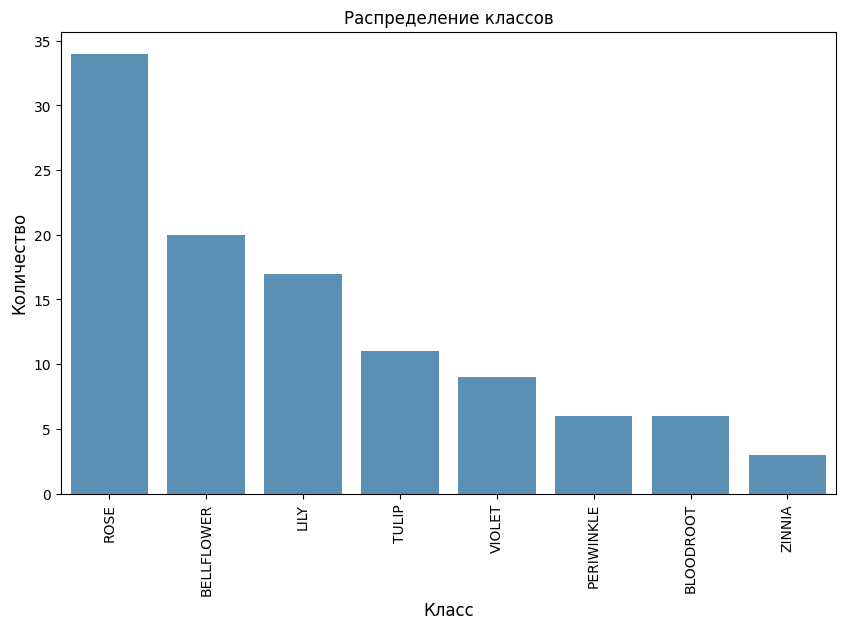

In [ ]:
# визуализация данных по классам
import matplotlib.pyplot as plt
import seaborn as sns

# Подсчет количества каждого класса
class_counts = newdata['Name'].value_counts()

# Создание графика
plt.figure(figsize=(10,6))
sns.barplot(x=class_counts.index, y=class_counts.values, alpha=0.8)
plt.title('Распределение классов')
plt.ylabel('Количество', fontsize=12)
plt.xlabel('Класс', fontsize=12)
plt.xticks(rotation=90)  # Поворот названий классов на 90 градусов для лучшей читаемости
plt.show()



In [ ]:
# Создание DataLoader для обучения и тестирования с выравниванием тензоров (max_length)
class FlowerDataset(Dataset):
    def __init__(self, sentences, labels, tokenizer, max_length):
        self.sentences = sentences
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.sentences)

    def __getitem__(self, idx):
        sentence = self.sentences[idx]
        label = self.labels[idx]
        encoding = self.tokenizer(
            sentence,
            return_tensors='pt',
            padding='max_length',
            truncation=True,
            max_length=self.max_length
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label)
        }



In [ ]:
# вычисление максимальной длины предложения
max_length = 0

for sentence in sentences:
    tokens = tokenizer.tokenize(sentence)
    max_length = max(max_length, len(tokens))

print(f"Максимальная длина предложения в токенах: {max_length}")


Максимальная длина предложения в токенах: 32


In [ ]:
# подготовка датасетов и загрузчиков
max_length = 35

train_dataset = FlowerDataset(train_sentences, train_labels, tokenizer, max_length)
test_dataset = FlowerDataset(test_sentences, test_labels, tokenizer, max_length)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=True)

# Оптимизатор
optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.09s/it]


Epoch 1, Loss 1.9379828373591106


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.06s/it]


Epoch 2, Loss 1.7335003813107808


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.06s/it]


Epoch 3, Loss 1.475418706734975


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.07s/it]


Epoch 4, Loss 1.333928922812144


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.07s/it]


Epoch 5, Loss 1.2244622906049092


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.06s/it]


Epoch 6, Loss 1.0341902673244476


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.06s/it]


Epoch 7, Loss 0.9082409391800562


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.05s/it]


Epoch 8, Loss 0.8174812992413839


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.04s/it]


Epoch 9, Loss 0.7658214867115021


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:06<00:00,  1.06s/it]

Epoch 10, Loss 0.7387036681175232


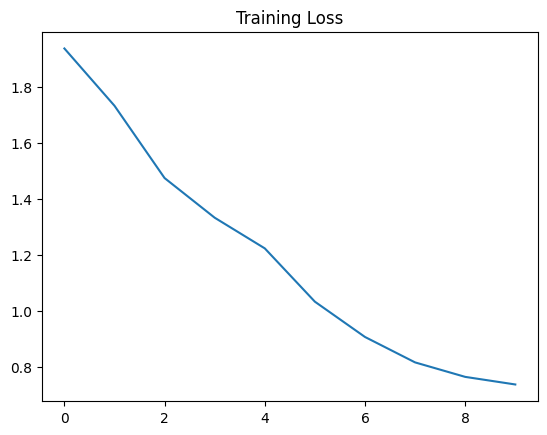

In [ ]:
# Обучение модели
model.train()
losses = []
for epoch in range(10):  # количество эпох
    total_loss = 0
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels'].long()

        # Проверка длины тензоров
        assert input_ids.shape[1] == attention_mask.shape[1], "Input IDs and attention mask must have the same length"

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss {avg_loss}')

# Визуализация обучения
plt.plot(losses)
plt.title('Training Loss')
plt.show()

# Сохранение модели
model.save_pretrained(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\my_model')

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.23it/s]


Epoch 1, Loss 0.6445673207441965
Epoch 1, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.23it/s]


Epoch 2, Loss 0.6523961027463278
Epoch 2, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.25it/s]


Epoch 3, Loss 0.6666697760423025
Epoch 3, Accuracy: 98.80952380952381%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.24it/s]


Epoch 4, Loss 0.6661253869533539
Epoch 4, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.25it/s]


Epoch 5, Loss 0.6973920663197836
Epoch 5, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.24it/s]


Epoch 6, Loss 0.6921118746201197
Epoch 6, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.24it/s]


Epoch 7, Loss 0.6726414561271667
Epoch 7, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.24it/s]


Epoch 8, Loss 0.7271326084931692
Epoch 8, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.24it/s]


Epoch 9, Loss 0.6655850311120352
Epoch 9, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.25it/s]


Epoch 10, Loss 0.7003031273682913
Epoch 10, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.25it/s]


Epoch 11, Loss 0.7142930825551351
Epoch 11, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.25it/s]


Epoch 12, Loss 0.6504798233509064
Epoch 12, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.25it/s]


Epoch 13, Loss 0.6888627161582311
Epoch 13, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.24it/s]


Epoch 14, Loss 0.6687691907087961
Epoch 14, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.25it/s]

Epoch 15, Loss 0.6861913800239563
Epoch 15, Accuracy: 97.61904761904762%


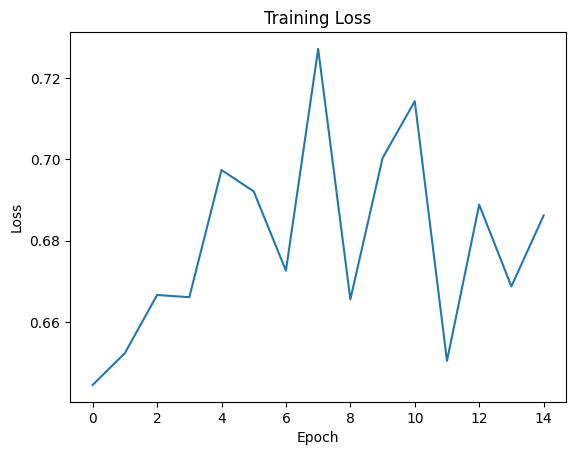

In [ ]:
# загружаем модель и продолжаем обучение с дополнительными показателями тренировки
model = BertForSequenceClassification.from_pretrained(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\my_model', num_labels=8)

losses = []
for epoch in range(15):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    # В цикле по батчам
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels'].long()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Вычисление точности
        _, predicted = torch.max(outputs.logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss {avg_loss}')

    accuracy = 100 * correct / total
    print(f'Epoch {epoch+1}, Accuracy: {accuracy}%')

# Визуализация обучения
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.23it/s]


Epoch 1, Loss 0.6954200863838196
Epoch 1, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.25it/s]


Epoch 2, Loss 0.6870933473110199
Epoch 2, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.25it/s]


Epoch 3, Loss 0.6843418975671133
Epoch 3, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.29it/s]


Epoch 4, Loss 0.7068471610546112
Epoch 4, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.25it/s]


Epoch 5, Loss 0.7237210770448049
Epoch 5, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.27it/s]


Epoch 6, Loss 0.6415866911411285
Epoch 6, Accuracy: 100.0%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.23it/s]


Epoch 7, Loss 0.6990795532862345
Epoch 7, Accuracy: 97.61904761904762%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.26it/s]


Epoch 8, Loss 0.7209031532208124
Epoch 8, Accuracy: 98.80952380952381%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.26it/s]


Epoch 9, Loss 0.6972808539867401
Epoch 9, Accuracy: 98.80952380952381%


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:04<00:00,  1.24it/s]

Epoch 10, Loss 0.6917867362499237
Epoch 10, Accuracy: 97.61904761904762%


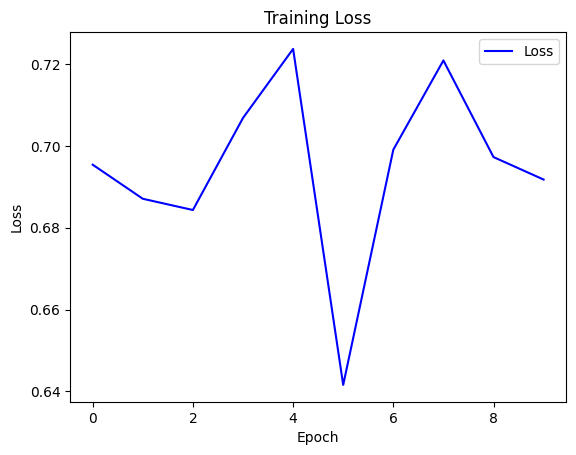

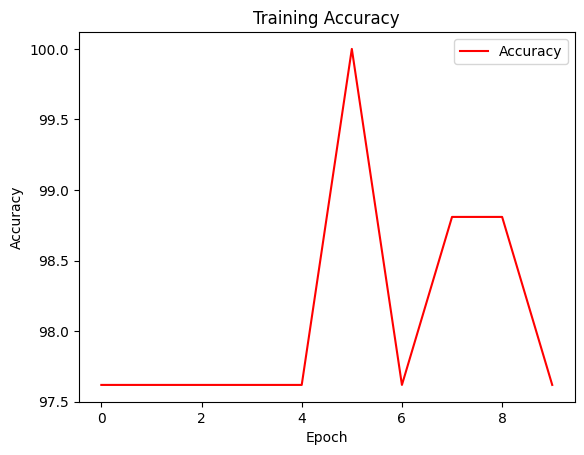

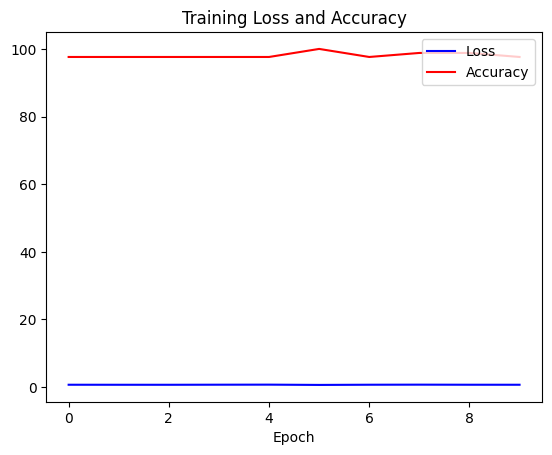

In [ ]:
# здесь добавляем на график точность и также делаем совмещенный график
model = BertForSequenceClassification.from_pretrained(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\my_model', num_labels=8)

losses = []
accuracies = []
for epoch in range(10):
    model.train()
    total_loss = 0
    correct = 0
    total = 0

    # В цикле по батчам
    for batch in tqdm(train_loader):
        optimizer.zero_grad()
        input_ids = batch['input_ids']
        attention_mask = batch['attention_mask']
        labels = batch['labels'].long()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Вычисление точности
        _, predicted = torch.max(outputs.logits, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    avg_loss = total_loss / len(train_loader)
    losses.append(avg_loss)
    print(f'Epoch {epoch+1}, Loss {avg_loss}')

    accuracy = 100 * correct / total
    accuracies.append(accuracy)
    print(f'Epoch {epoch+1}, Accuracy: {accuracy}%')

# Визуализация обучения
import matplotlib.pyplot as plt
plt.plot(losses, label='Loss', color='blue')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')  # добавляем легенду
plt.show()

plt.plot(accuracies, label='Accuracy', color='red')
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper right')  # добавляем легенду
plt.show()

plt.plot(losses, label='Loss', color='blue')
plt.plot(accuracies, label='Accuracy', color='red')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper right')  # добавляем легенду
plt.show()


In [ ]:
# Переводим модель в режим оценки
model = BertForSequenceClassification.from_pretrained(r'C:\Users\Admin\Desktop\Питон\Рекомендации1\my_model', num_labels=8)

model.eval()

# Создаем список для хранения предсказаний
predictions = []

# Проходим по тестовому набору данных
for batch in tqdm(test_loader):
    input_ids = batch['input_ids']
    attention_mask = batch['attention_mask']

    # Передаем данные в модель и получаем предсказания
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

    # Получаем вероятности принадлежности к классам
    probs = torch.nn.functional.softmax(outputs.logits, dim=-1)

    # Получаем класс с наибольшей вероятностью для каждого примера в батче
    preds = torch.argmax(probs, dim=-1)

    # Добавляем предсказания в список
    predictions.extend(preds.tolist())

# Преобразуем числовые метки обратно в имена цветов
predicted_labels = le.inverse_transform(predictions)
print(predicted_labels)

for i, label in enumerate(predicted_labels):
    print(f"Пример {i+1}: {label}")


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  4.54it/s]

['LILY' 'ROSE' 'BELLFLOWER' 'BELLFLOWER' 'LILY' 'ROSE' 'BELLFLOWER'
 'TULIP' 'ROSE' 'VIOLET' 'VIOLET' 'LILY' 'VIOLET' 'ROSE' 'LILY'
 'BLOODROOT' 'ROSE' 'ROSE' 'ROSE' 'LILY' 'BELLFLOWER' 'LILY']
Пример 1: LILY
Пример 2: ROSE
Пример 3: BELLFLOWER
Пример 4: BELLFLOWER
Пример 5: LILY
Пример 6: ROSE
Пример 7: BELLFLOWER
Пример 8: TULIP
Пример 9: ROSE
Пример 10: VIOLET
Пример 11: VIOLET
Пример 12: LILY
Пример 13: VIOLET
Пример 14: ROSE
Пример 15: LILY
Пример 16: BLOODROOT
Пример 17: ROSE
Пример 18: ROSE
Пример 19: ROSE
Пример 20: LILY
Пример 21: BELLFLOWER
Пример 22: LILY


Предикт показал ошибку, вместо того, чтобы подавать на вход цветы и описания, а получать группы, у нвс и на входе цветы и на выходе. Надо переделывать.

In [ ]:
new_description = "A highly recognized flower which has bright colors and a strong scent."from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

descriptions = newdata['description']
groups = newdata['group']

# Преобразование описания в векторы признаков с помощью TF-IDF Vectorizer
vectorizer = TfidfVectorizer()
description_features = vectorizer.fit_transform(descriptions)

# Преобразование групп в метки с помощью LabelEncoder
le = LabelEncoder()
group_labels = le.fit_transform(groups)

# Обучение модели на основе описаний и групп
model = RandomForestClassifier()
model.fit(description_features, group_labels)

new_description = "A highly recognized flower which has bright colors and a strong scent."
new_description_features = vectorizer.transform([new_description])
predicted_label = model.predict(new_description_features)

#  Обратное преобразование LabelEncoder, чтобы получить группу из предсказанной метки
predicted_group = le.inverse_transform(predicted_label)
print(predicted_group)